# Rohlik Orders Forecasting Challenge

### Overview

Rohlik Group, a leading European e-grocery innovator, is revolutionising the food retail industry. We operate across 11 warehouses in Czech Republic, Germany, Austria, Hungary, and Romania.

Our challenge focuses on predicting the number of orders (grocery deliveries) at selected warehouses for the next 60 days.

Accurate order forecasts are crucial for planning process, impacting workforce allocation, delivery logistics, inventory management, and supply chain efficiency. By optimizing forecasts, we can minimize waste and streamline operations, making our e-grocery services more sustainable and efficient.

### Data Description
You are provided with historical orders data for selected Rohlik warehouses. The task is to forecast the "orders" column for the test set. Some features are not available in test as they are not known at the moment of making the prediction (e.g. precipitation, shutdown, user activity on website). 

### Files
 - **train.csv** - the training set containing the historical orders data and selected features described below
 - **test.csv** - the test set
 - **solution_example.csv** - a sample submission file in the correct format
 - **train_calendar.csv** - a calendar for the training set containing data about holidays or warehouse specific events, some columns are already in the train data but there are additional rows in this file for dates where some warehouses could be closed due to public holiday or Sunday (and therefore they are not in the train set)
 - **test_calendar.csv** - a calendar for the test set

### Columns
- `warehouse` - warehouse name

- `date` - date

-  **`orders` - number of customer orders attributed to the warehouse**  ==*target variable*==

- `holiday_name` - name of public holiday if any

- `holiday` - 0/1 indicating the presence of holidays

- `shutdown` - warehouse shutdown or limitation due to operations *(not provided in test)*
- `mini_shutdown` - warehouse shutdown or limitation due to operations *(not provided in test)*
- `shops_closed` - public holiday with most of the shops or large part of shops closed
- `winter_school_holidays` - school holidays
- `school_holidays` - school holidays
- `blackout` - warehouse shutdown or limitation due to operations *(not provided in test)*
- `mov_change` - a change in minimum order value indicating potential change in customer behaviour *(not provided in test)*
- `frankfurt_shutdown` - warehouse shutdown or limitation due to operations *(not provided in test)*
- `precipitation` - precipitation in mm around the location of the warehouse which correlates with location of the customers *(not provided in test)*
- `snow`- snowfall in mm around the location of the warehouse which correlates with location of the customers *(not provided in test)*
- `user_activity_1` - user activity on the website *(not provided in test)*
- `user_activity_2` - user activity on the website *(not provided in test)*
- `id` - row id consisting of warehouse name and date

# Exploratory Data Analysis

In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
#from rohlik_forecasting import visualization_setting

In [3]:
# Setting the visualization settings
from rohlik_forecasting.utils import main_utils
main_utils.set_visualization_settings()

In [5]:
os.chdir('../')

In [6]:
%pwd

'/Users/dhruv/PROJECTS/Kaggle_Projects/Rohlik-Orders-Forecasting-Challenge'

### Training Data

In [42]:
df_train = pd.read_csv('./artifacts/data_ingestion/train.csv')

In [41]:
df_train.columns

Index(['warehouse', 'date', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id'],
      dtype='object')

In [45]:
#Keeping only columns which are present in the test data
lists = ['warehouse', 'date', 'orders', 'holiday_name', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays','id']
# Dropping columns which are not present in the lists
df =df_train.drop(columns = df_train.columns.difference(lists))
df.head()

warehouse        date  orders holiday_name  holiday  shops_closed  \
0  Prague_1  2020-12-05  6895.0          NaN        0             0   
1  Prague_1  2020-12-06  6584.0          NaN        0             0   
2  Prague_1  2020-12-07  7030.0          NaN        0             0   
3  Prague_1  2020-12-08  6550.0          NaN        0             0   
4  Prague_1  2020-12-09  6910.0          NaN        0             0   

   winter_school_holidays  school_holidays                   id  
0                       0                0  Prague_1_2020-12-05  
1                       0                0  Prague_1_2020-12-06  
2                       0                0  Prague_1_2020-12-07  
3                       0                0  Prague_1_2020-12-08  
4                       0                0  Prague_1_2020-12-09

In [46]:
df_test = pd.read_csv('./artifacts/data_ingestion/test.csv')
df_test.head()

warehouse        date holiday_name  holiday  shops_closed  \
0  Prague_1  2024-03-16          NaN        0             0   
1  Prague_1  2024-03-17          NaN        0             0   
2  Prague_1  2024-03-18          NaN        0             0   
3  Prague_1  2024-03-19          NaN        0             0   
4  Prague_1  2024-03-20          NaN        0             0   

   winter_school_holidays  school_holidays                   id  
0                       0                0  Prague_1_2024-03-16  
1                       0                0  Prague_1_2024-03-17  
2                       0                0  Prague_1_2024-03-18  
3                       0                0  Prague_1_2024-03-19  
4                       0                0  Prague_1_2024-03-20

In [47]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-----------------')

warehouse
['Prague_1' 'Brno_1' 'Prague_2' 'Prague_3' 'Munich_1' 'Frankfurt_1'
 'Budapest_1']
-----------------
date
['2020-12-05' '2020-12-06' '2020-12-07' ... '2024-03-13' '2024-03-14'
 '2024-03-15']
-----------------
orders
[6895. 6584. 7030. ... 6661. 6843. 8130.]
-----------------
holiday_name
[nan 'Christmas Eve' '2nd Christmas Day' 'New Years Day'
 'International womens day' 'Good Friday' 'Easter Monday' 'Labour Day'
 'Den osvobozeni' 'Cyrila a Metodej' 'Jan Hus' 'Den ceske statnosti'
 'Den vzniku samostatneho ceskoslovenskeho statu'
 'Den boje za svobodu a demokracii' 'Peace Festival in Augsburg'
 'Reformation Day' 'Memorial Day of the Republic'
 'Memorial Day for the Victims of the Communist Dictatorships'
 'Memorial Day for the Victims of the Holocaust' 'National Defense Day'
 'Day of National Unity' 'Independent Hungary Day'
 'Memorial Day for the Martyrs of Arad'
 '1848 Revolution Memorial Day (Extra holiday)' "All Saints' Day Holiday"]
-----------------
holiday
[0 1]
------

In [64]:
main_utils.initial_analysis(df)


 The shape of the dataset:(7340, 9)

 Number of columns in the dataset:9

 Number of rows in the dataset:7340

 Data types in the dataset :
 
warehouse                         object
date                      datetime64[ns]
orders                           float64
holiday_name                      object
holiday                            int64
shops_closed                       int64
winter_school_holidays             int64
school_holidays                    int64
id                                object
dtype: object
*********************************************
 Number of Numerical Features : 5

 Number of Categorical Features : 4
Numerical Features: 
 Index(['orders', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays'],
      dtype='object')
Categorical Features: 
 Index(['warehouse', 'date', 'holiday_name', 'id'], dtype='object')
****************************************
 Number of missing values :
 
warehouse                 0
date                      

<function rohlik_forecasting.utils.main_utils.initial_analysis(dataset)>

In [61]:
df.describe().T

count                           mean  \
date                      7340  2022-08-27 18:17:27.629427968   
orders                  7340.0                    5535.443869   
holiday                 7340.0                       0.027248   
shops_closed            7340.0                       0.010899   
winter_school_holidays  7340.0                       0.029973   
school_holidays         7340.0                       0.007084   

                                        min                  25%  \
date                    2020-12-05 00:00:00  2021-11-23 00:00:00   
orders                                790.0               4434.0   
holiday                                 0.0                  0.0   
shops_closed                            0.0                  0.0   
winter_school_holidays                  0.0                  0.0   
school_holidays                         0.0                  0.0   

                                        50%                  75%  \
date                    2022-09-08 00:00:00  2023-06-13 06:00:00   
orders                               5370.0              7009.25   
holiday                                 0.0                  0.0   
shops_closed                            0.0                  0.0   
winter_school_holidays                  0.0                  0.0   
school_holidays                         0.0                  0.0   

                                        max          std  
date                    2024-03-15 00:00:00          NaN  
orders                              18139.0  2182.680279  
holiday                                 1.0     0.162816  
shops_closed                            1.0     0.103836  
winter_school_holidays                  1.0     0.170524  
school_holidays                         1.0     0.083876

In [63]:
#replace the nan values with 'No Holiday'
df['holiday_name'] = df['holiday_name'].fillna('No Holiday')

In [53]:
# define numerical & categorical columns
df['date'] = pd.to_datetime(df['date'])
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [54]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

warehouse
Prague_1       16.253406
Brno_1         16.253406
Prague_2       16.253406
Prague_3       16.253406
Budapest_1     15.722071
Munich_1       10.694823
Frankfurt_1     8.569482
Name: proportion, dtype: float64
---------------------------
holiday_name
International womens day                                       11.926606
Christmas Eve                                                  10.550459
New Years Day                                                   7.339450
2nd Christmas Day                                               7.339450
Cyrila a Metodej                                                5.504587
Den vzniku samostatneho ceskoslovenskeho statu                  5.504587
Den ceske statnosti                                             5.504587
Jan Hus                                                         5.504587
Den boje za svobodu a demokracii                                5.504587
Den osvobozeni                                                  5.504587
Labour Day 

### Univariate Analysis

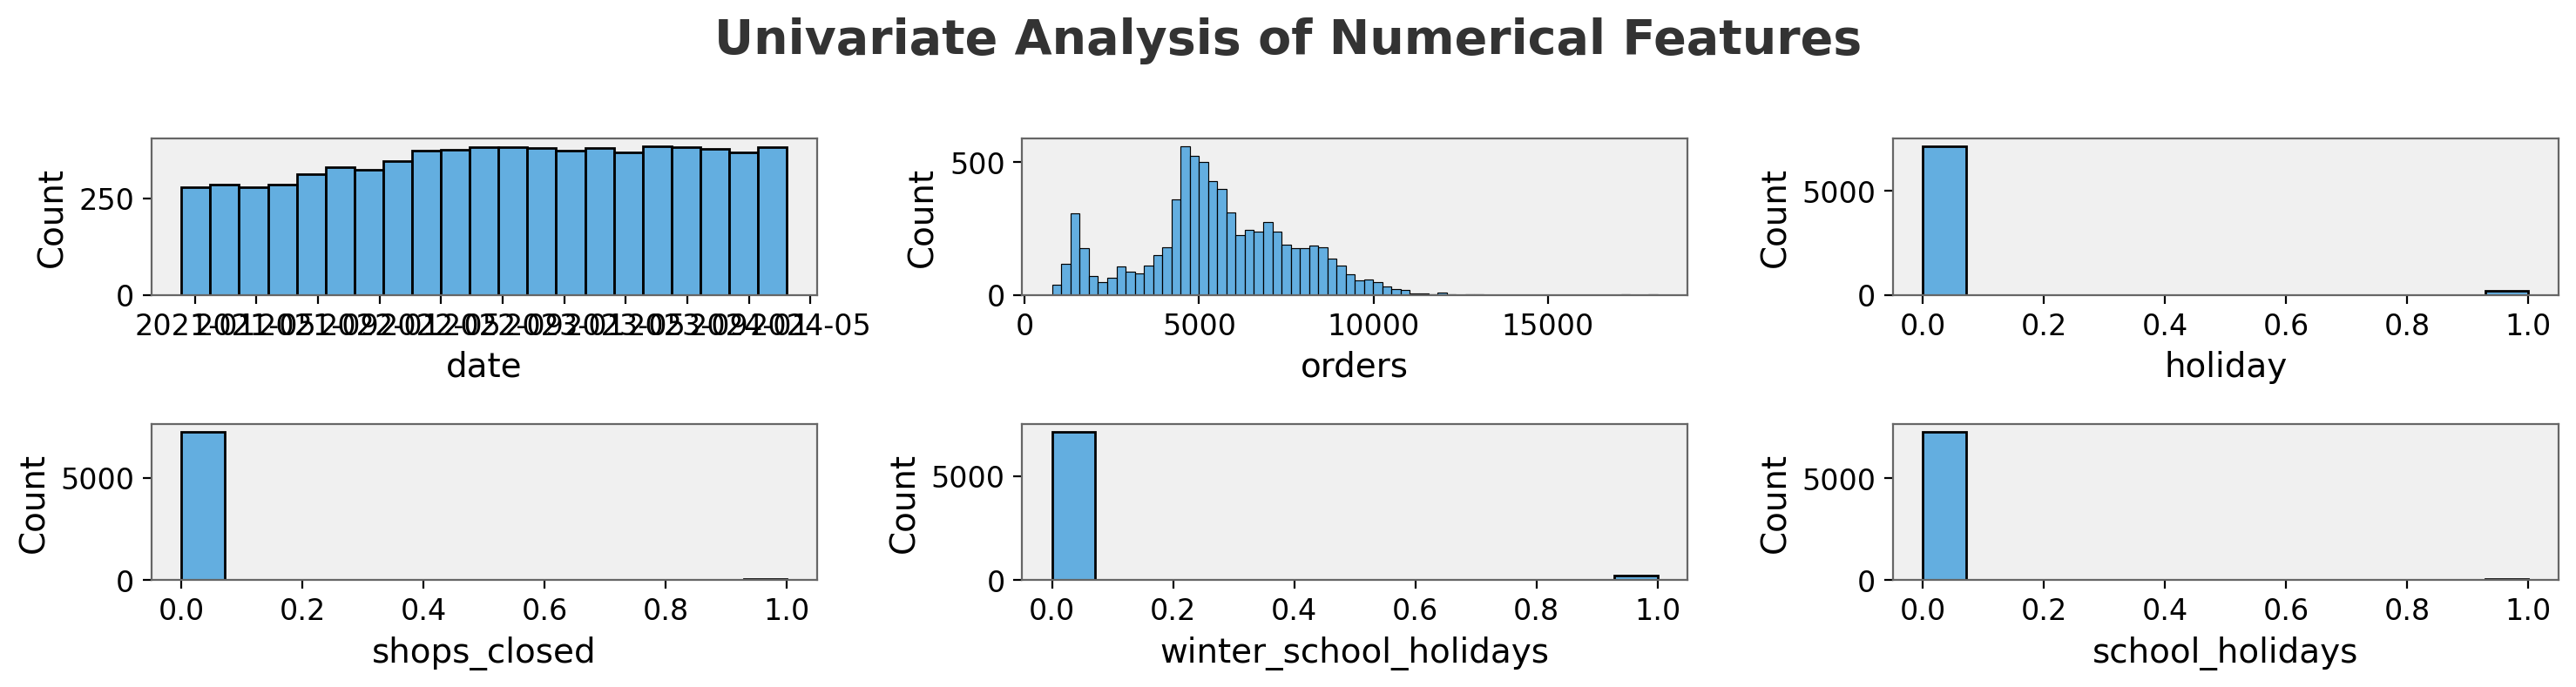

In [55]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.histplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

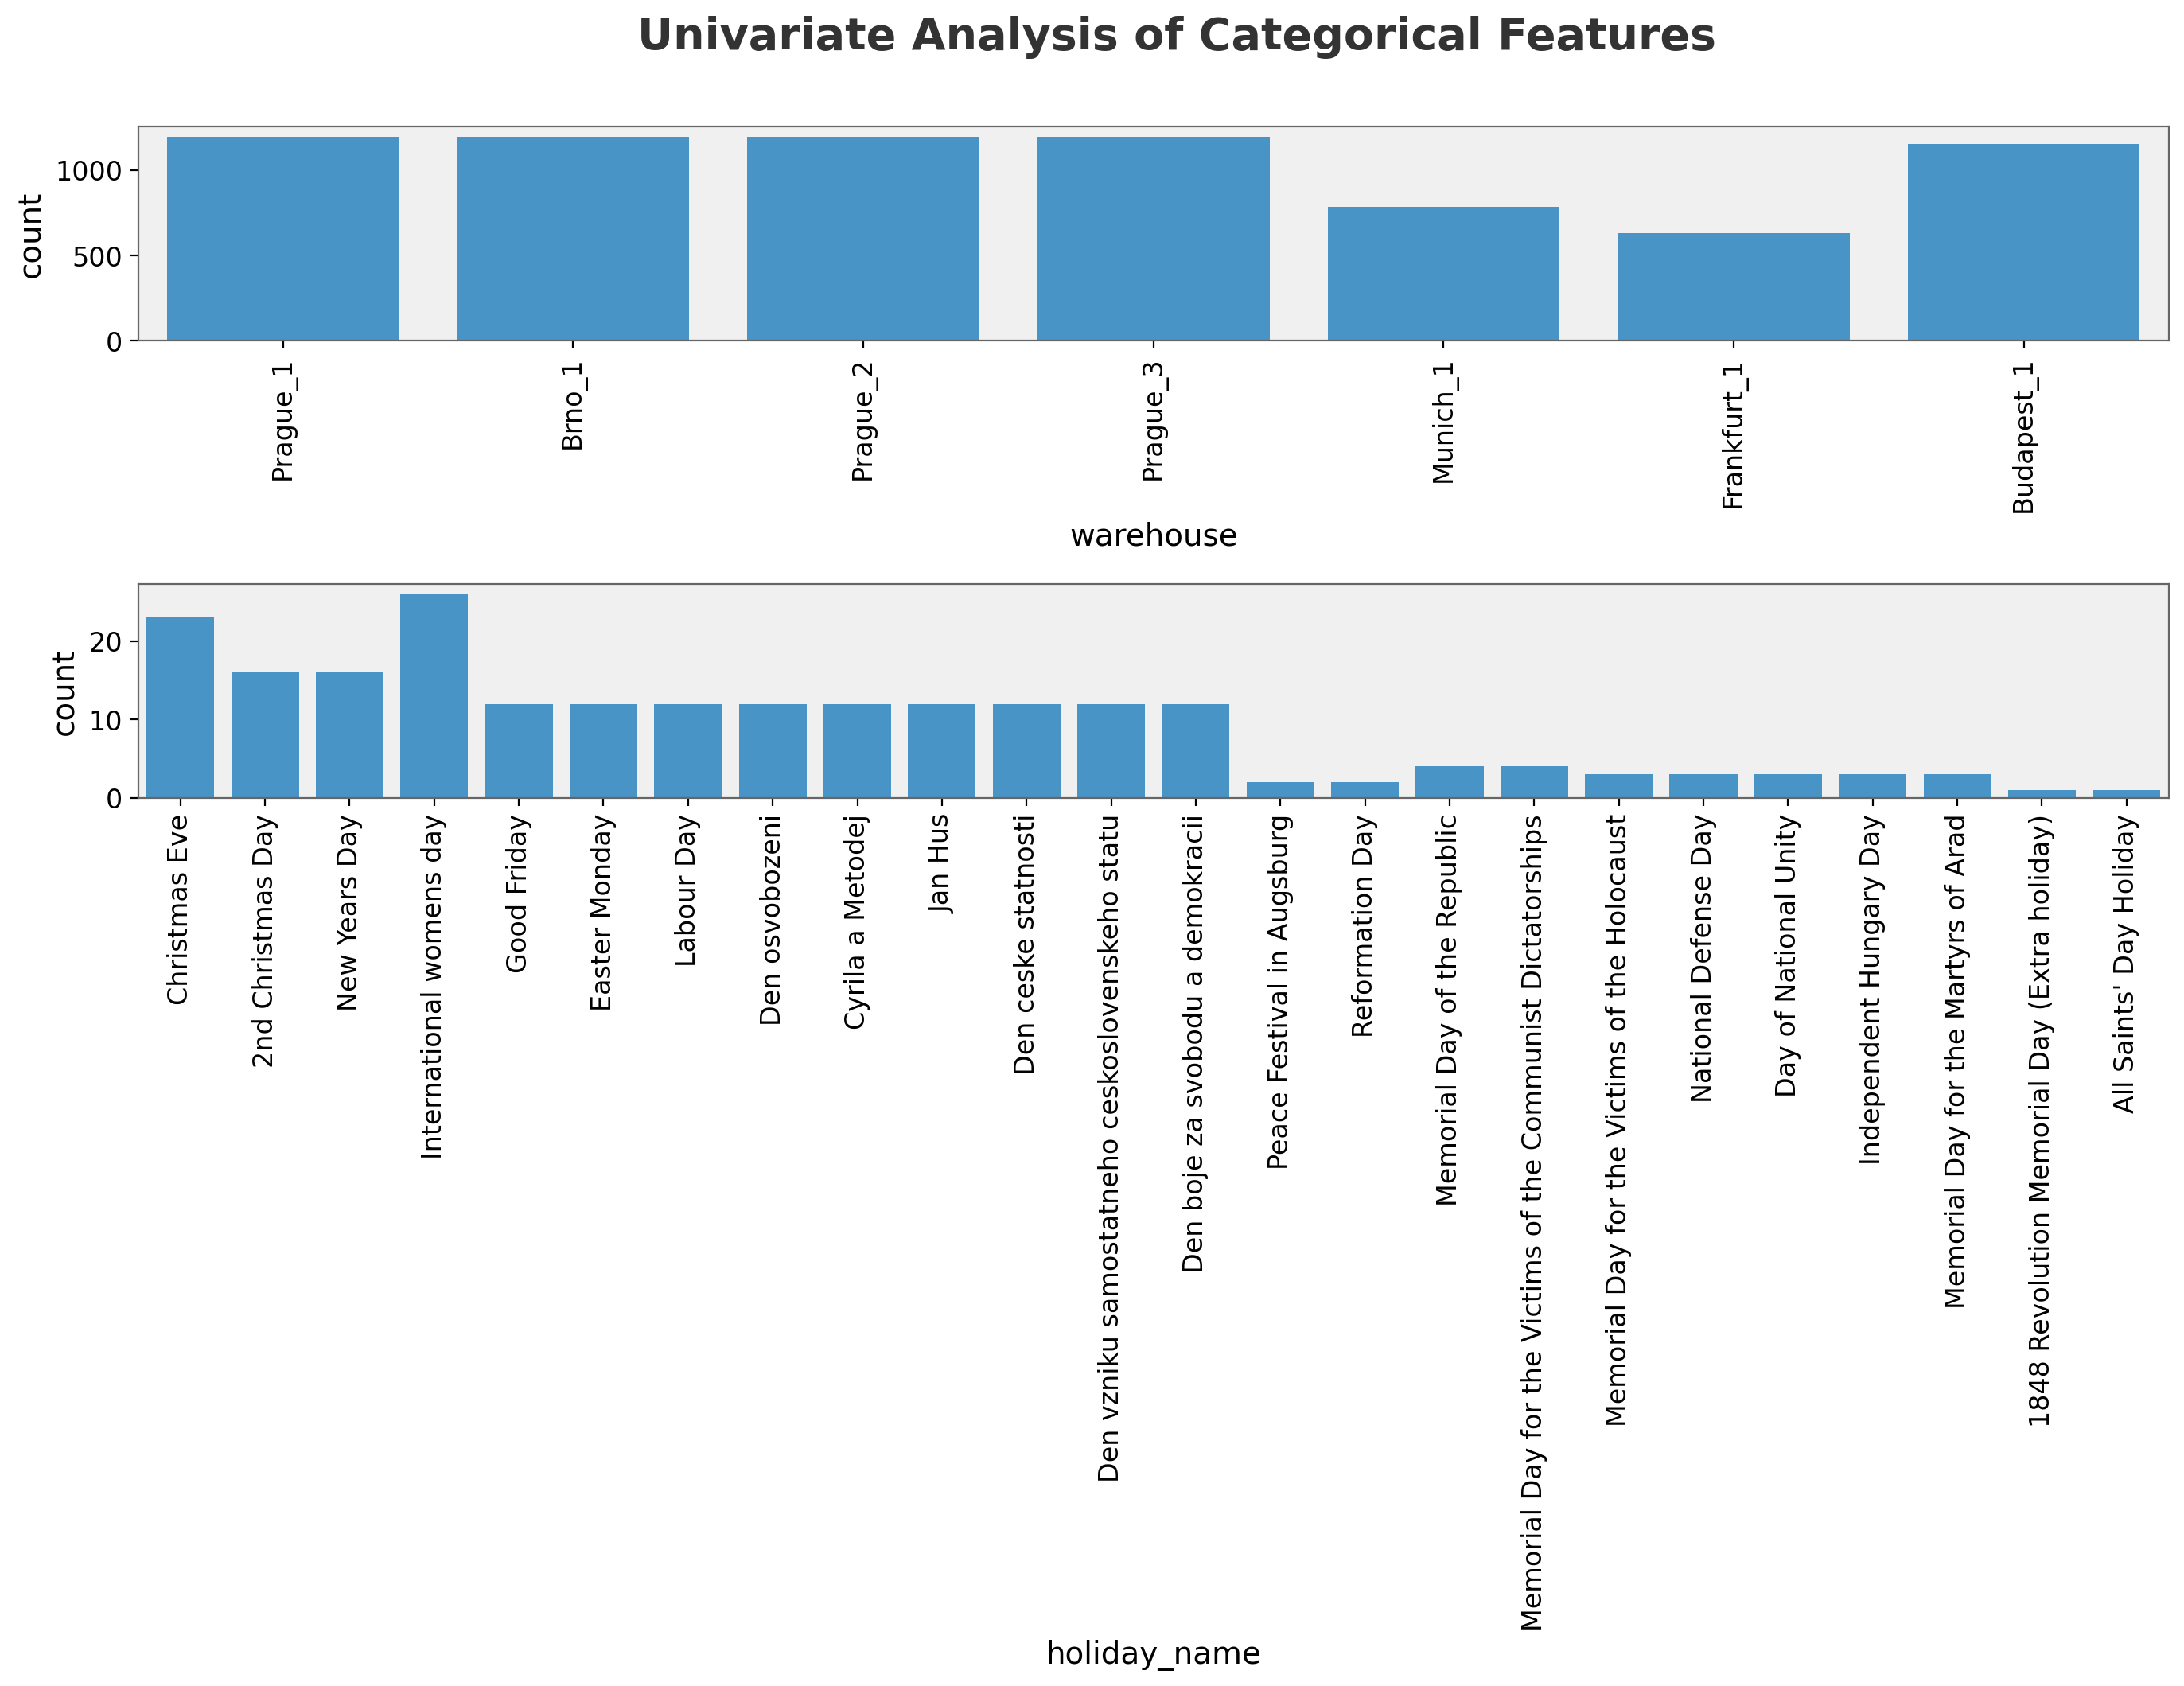

In [56]:
# categorical columns
categorical_features.remove('id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 1, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    plt.xticks(rotation=90)
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

Warehouse: Prague_1 min_date: 2020-12-05 00:00:00
Warehouse: Prague_1 max_date: 2024-03-15 00:00:00
-----------------
Warehouse: Brno_1 min_date: 2020-12-05 00:00:00
Warehouse: Brno_1 max_date: 2024-03-15 00:00:00
-----------------
Warehouse: Prague_2 min_date: 2020-12-05 00:00:00
Warehouse: Prague_2 max_date: 2024-03-15 00:00:00
-----------------
Warehouse: Prague_3 min_date: 2020-12-05 00:00:00
Warehouse: Prague_3 max_date: 2024-03-15 00:00:00
-----------------
Warehouse: Munich_1 min_date: 2021-07-21 00:00:00
Warehouse: Munich_1 max_date: 2024-03-15 00:00:00
-----------------
Warehouse: Frankfurt_1 min_date: 2022-02-18 00:00:00
Warehouse: Frankfurt_1 max_date: 2024-03-15 00:00:00
-----------------
Warehouse: Budapest_1 min_date: 2020-12-05 00:00:00
Warehouse: Budapest_1 max_date: 2024-03-14 00:00:00
-----------------


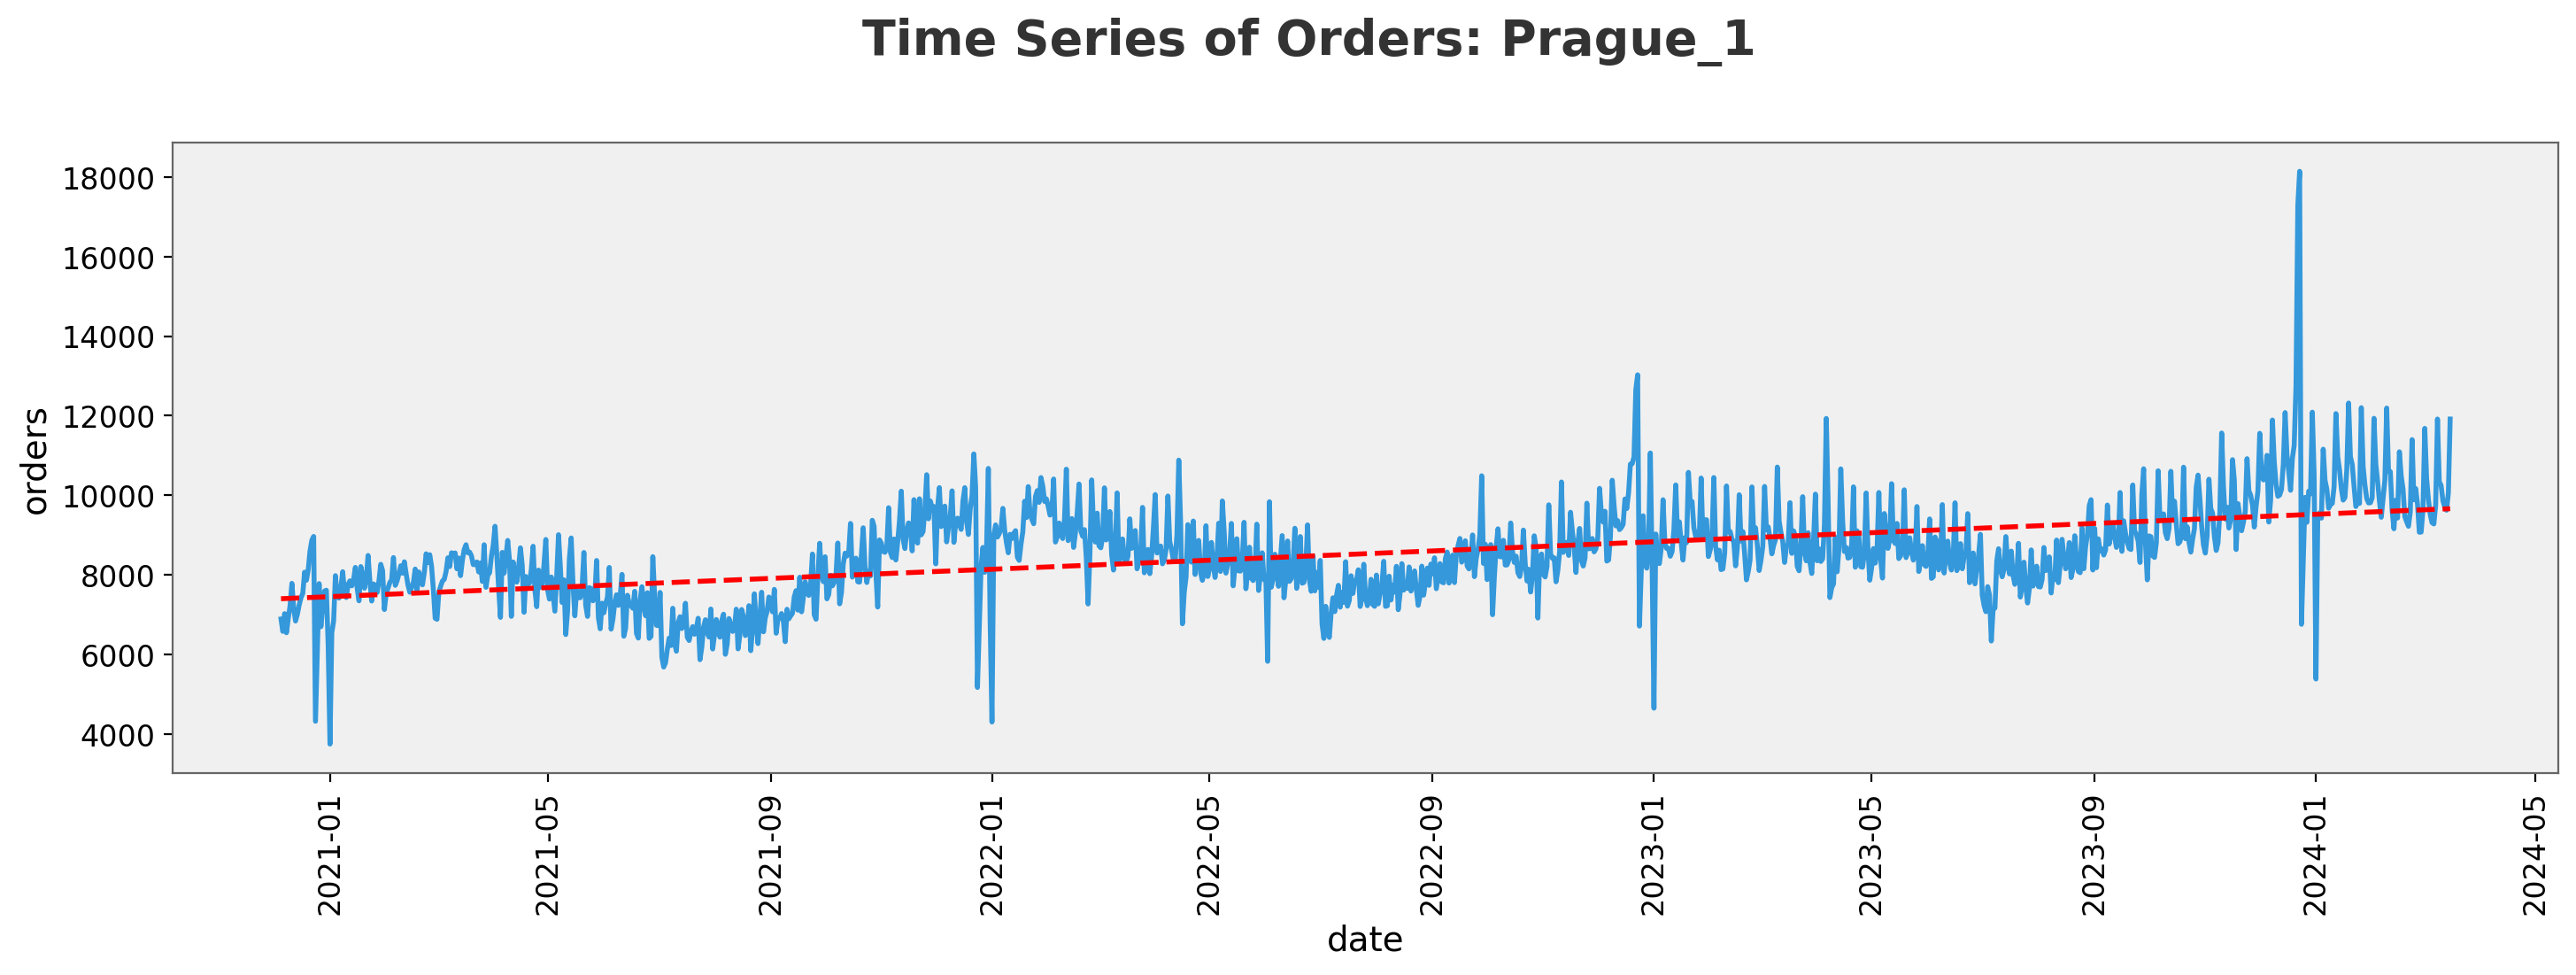

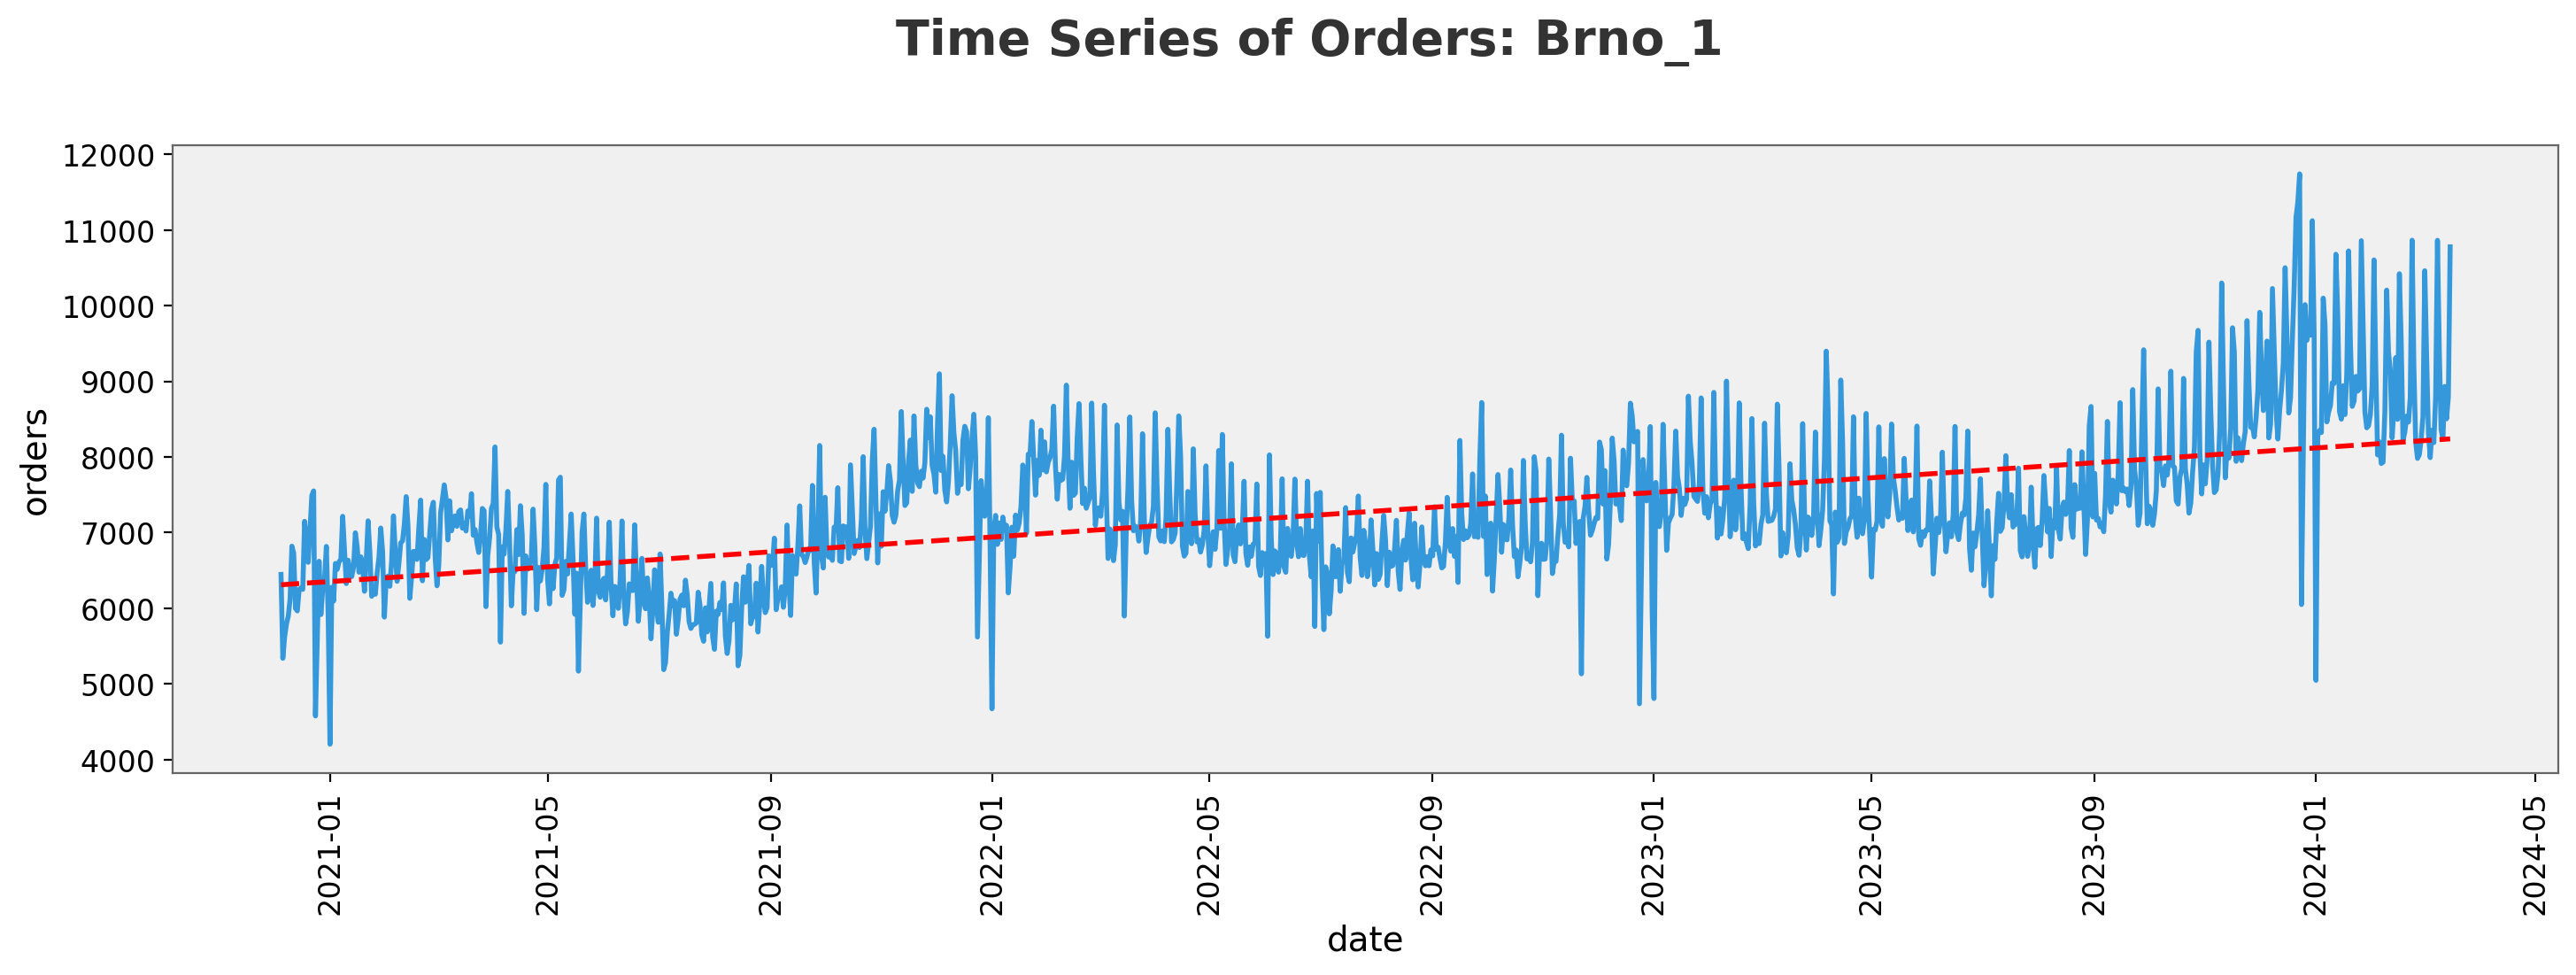

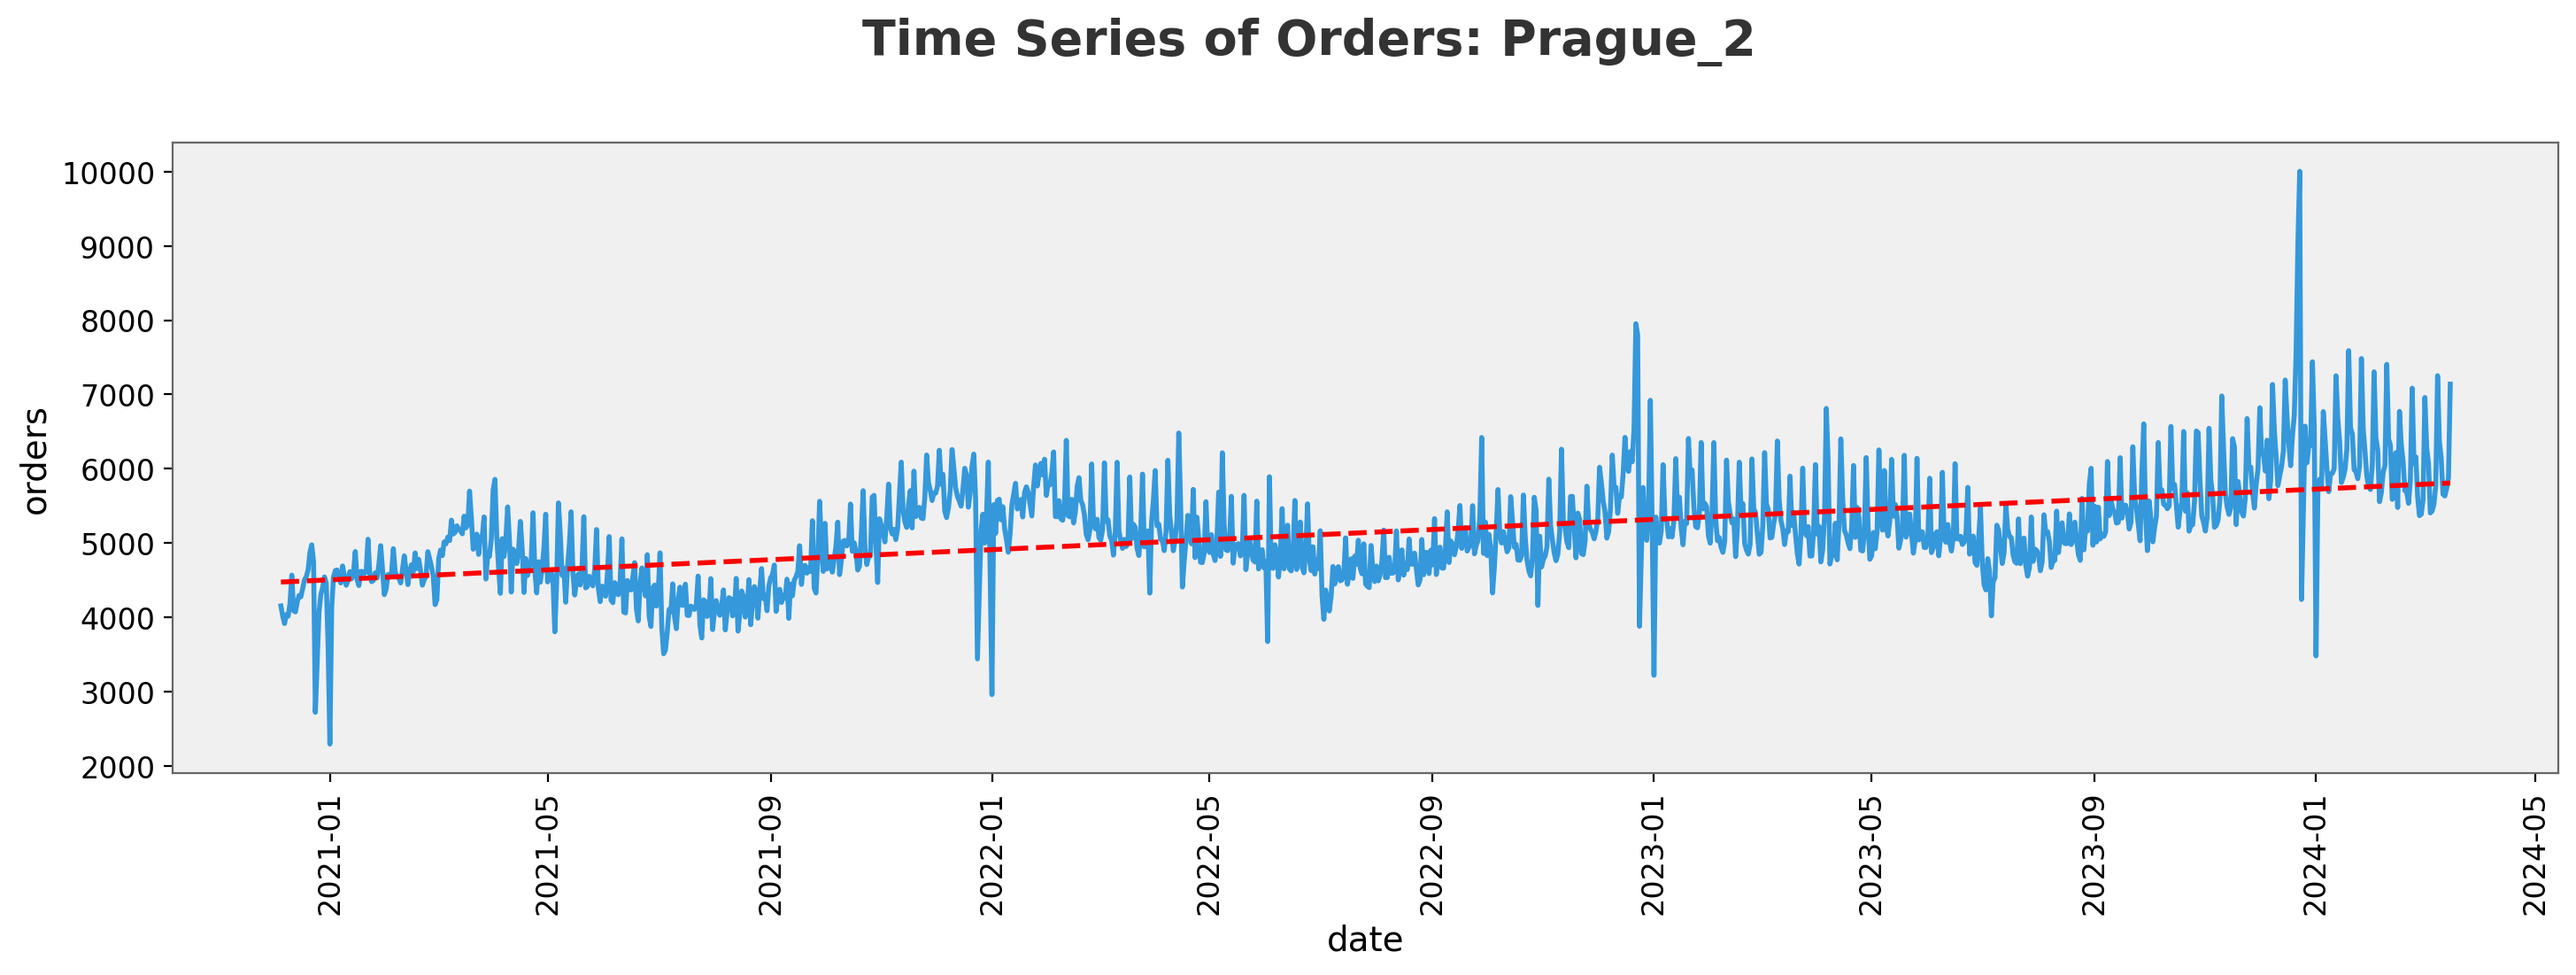

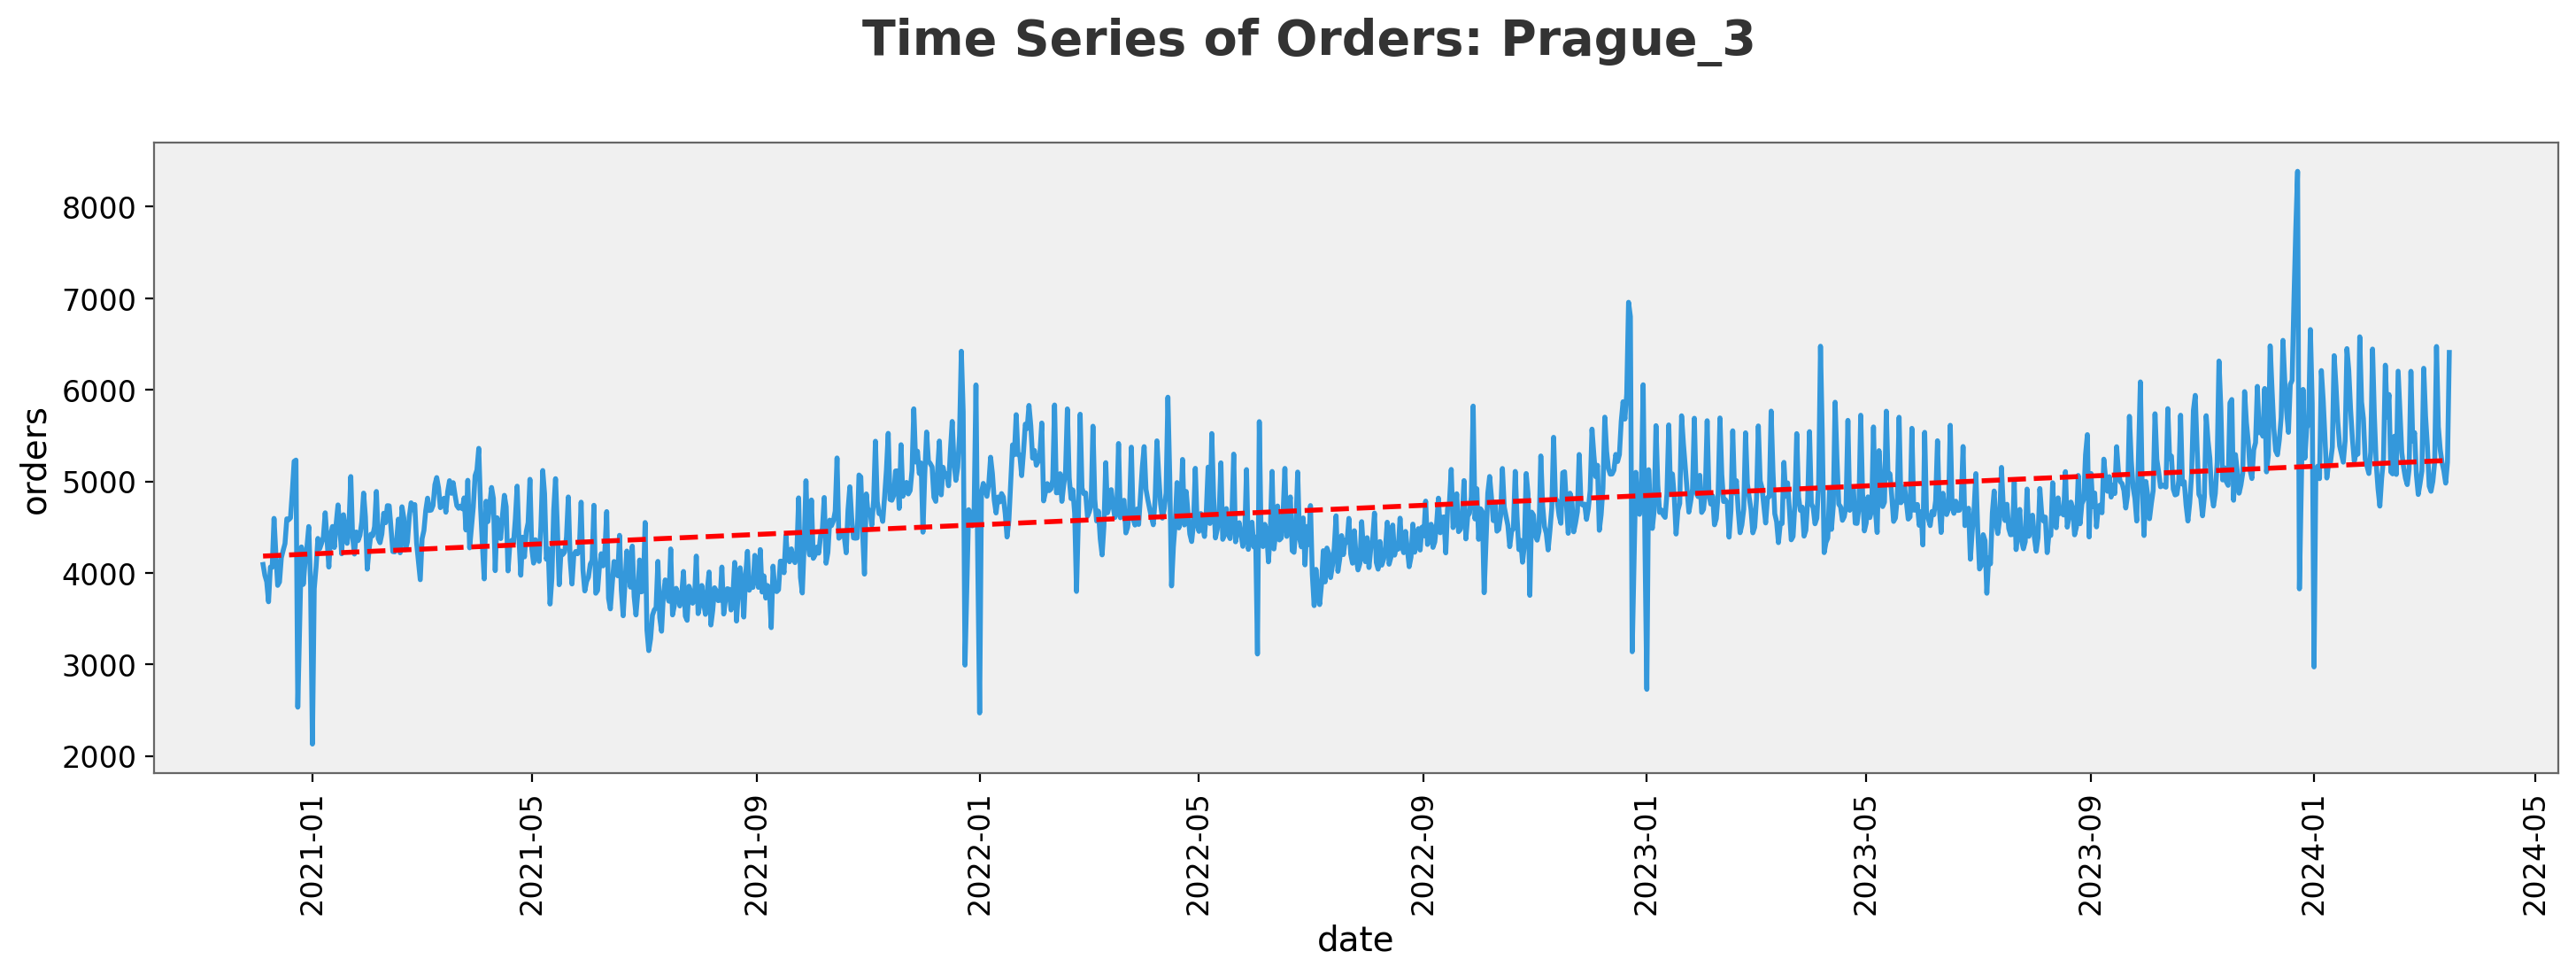

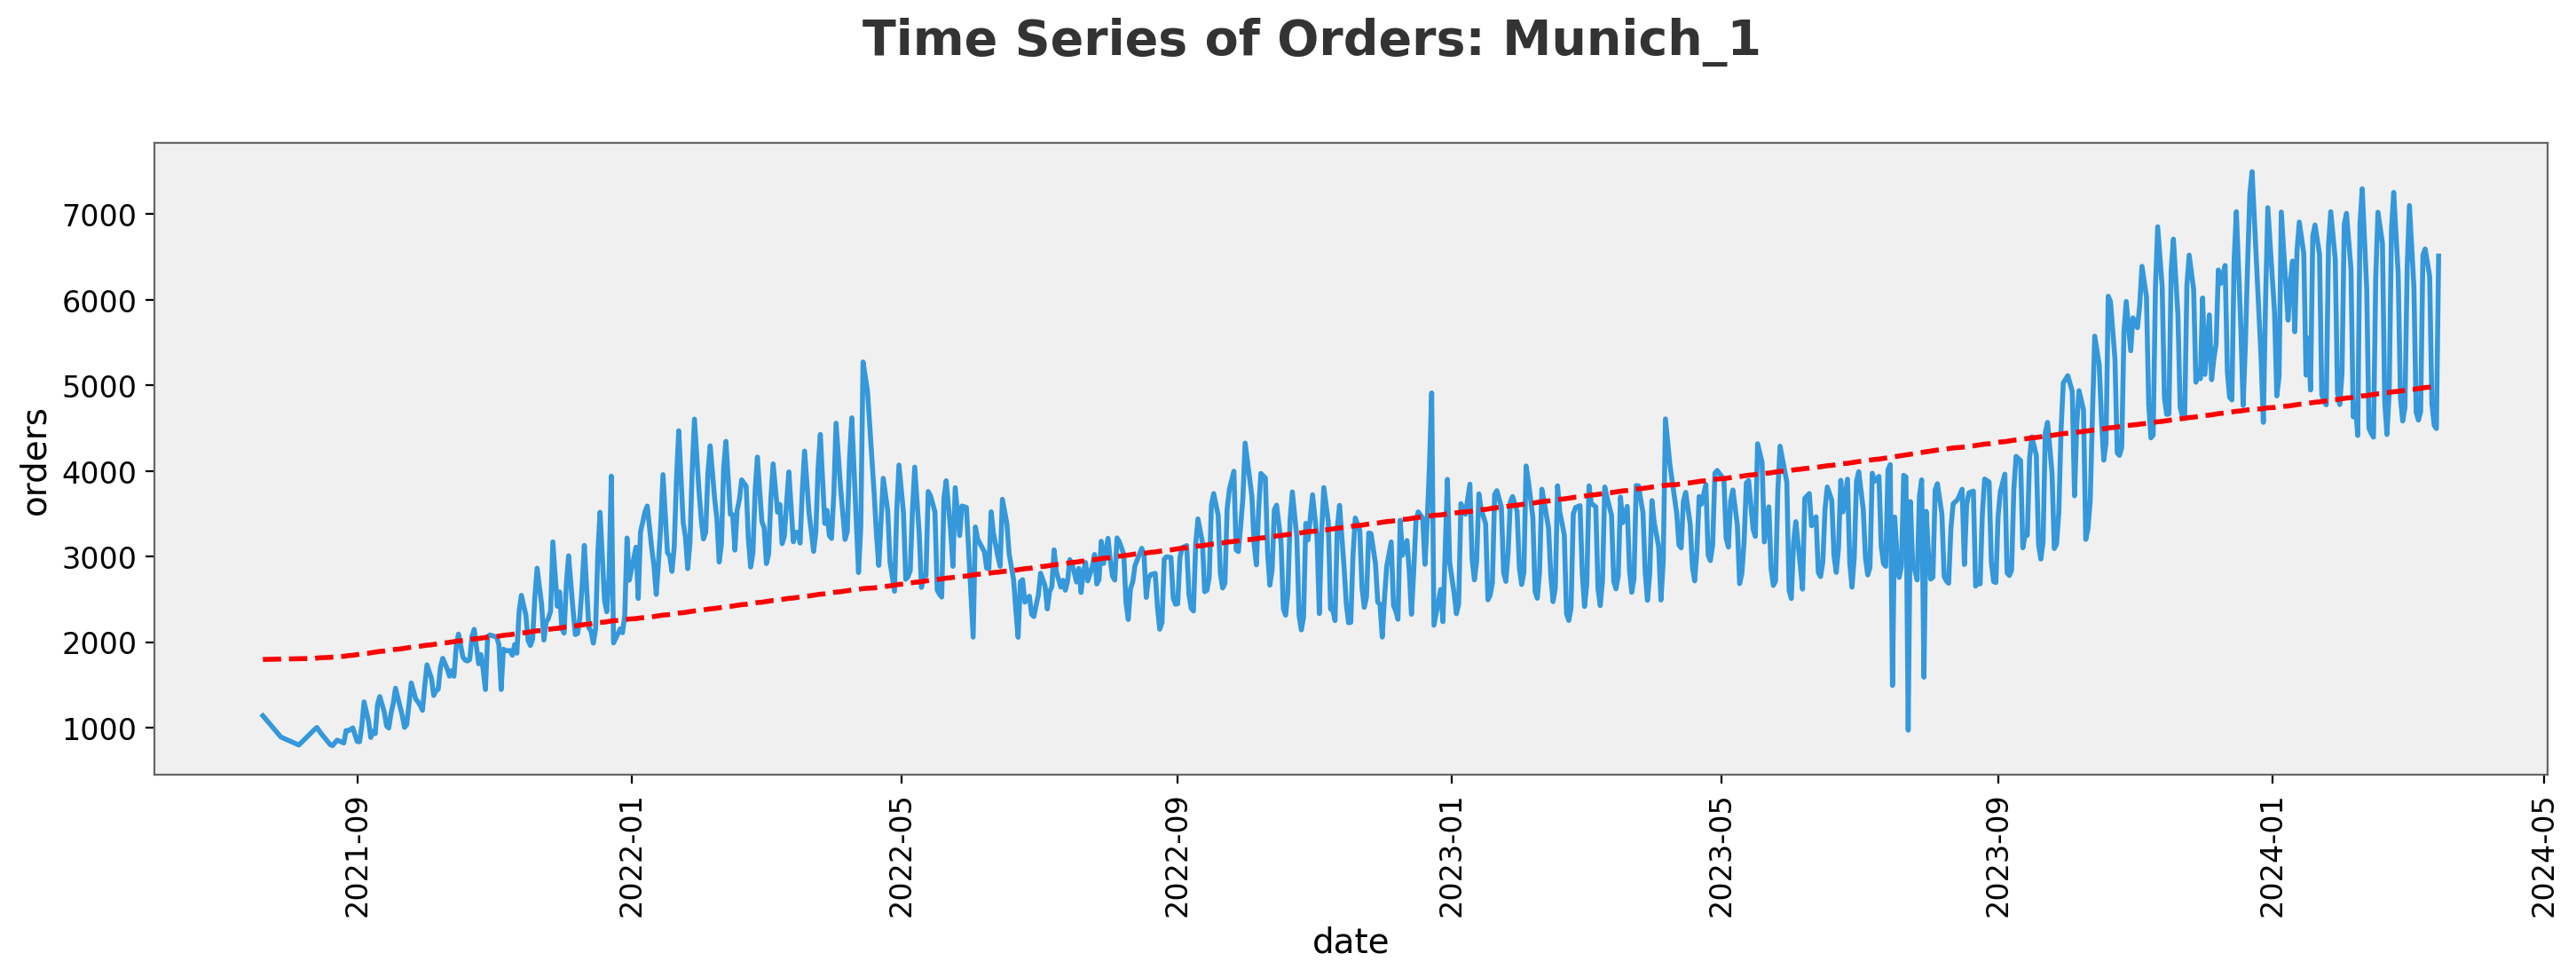

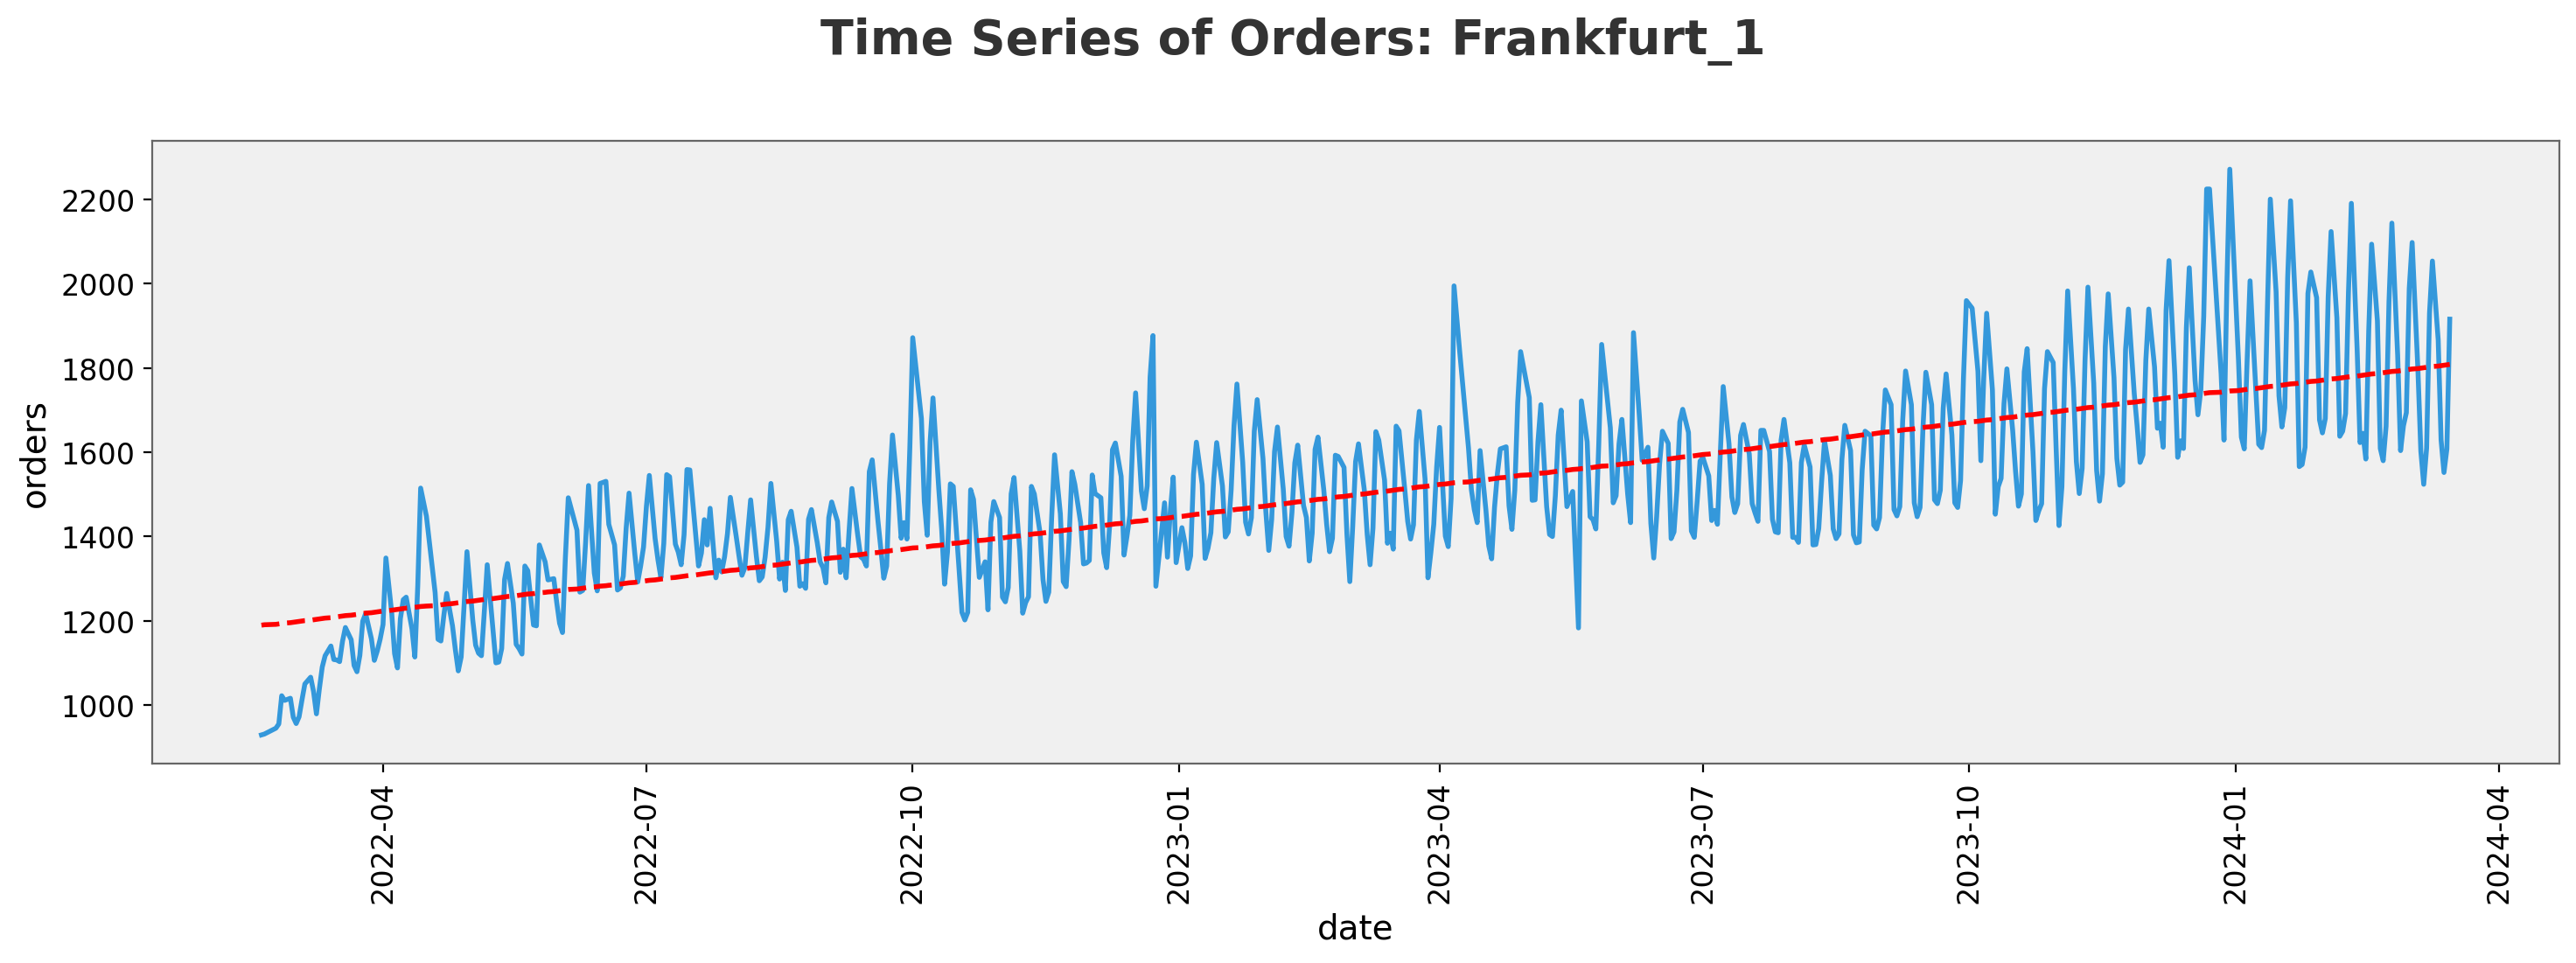

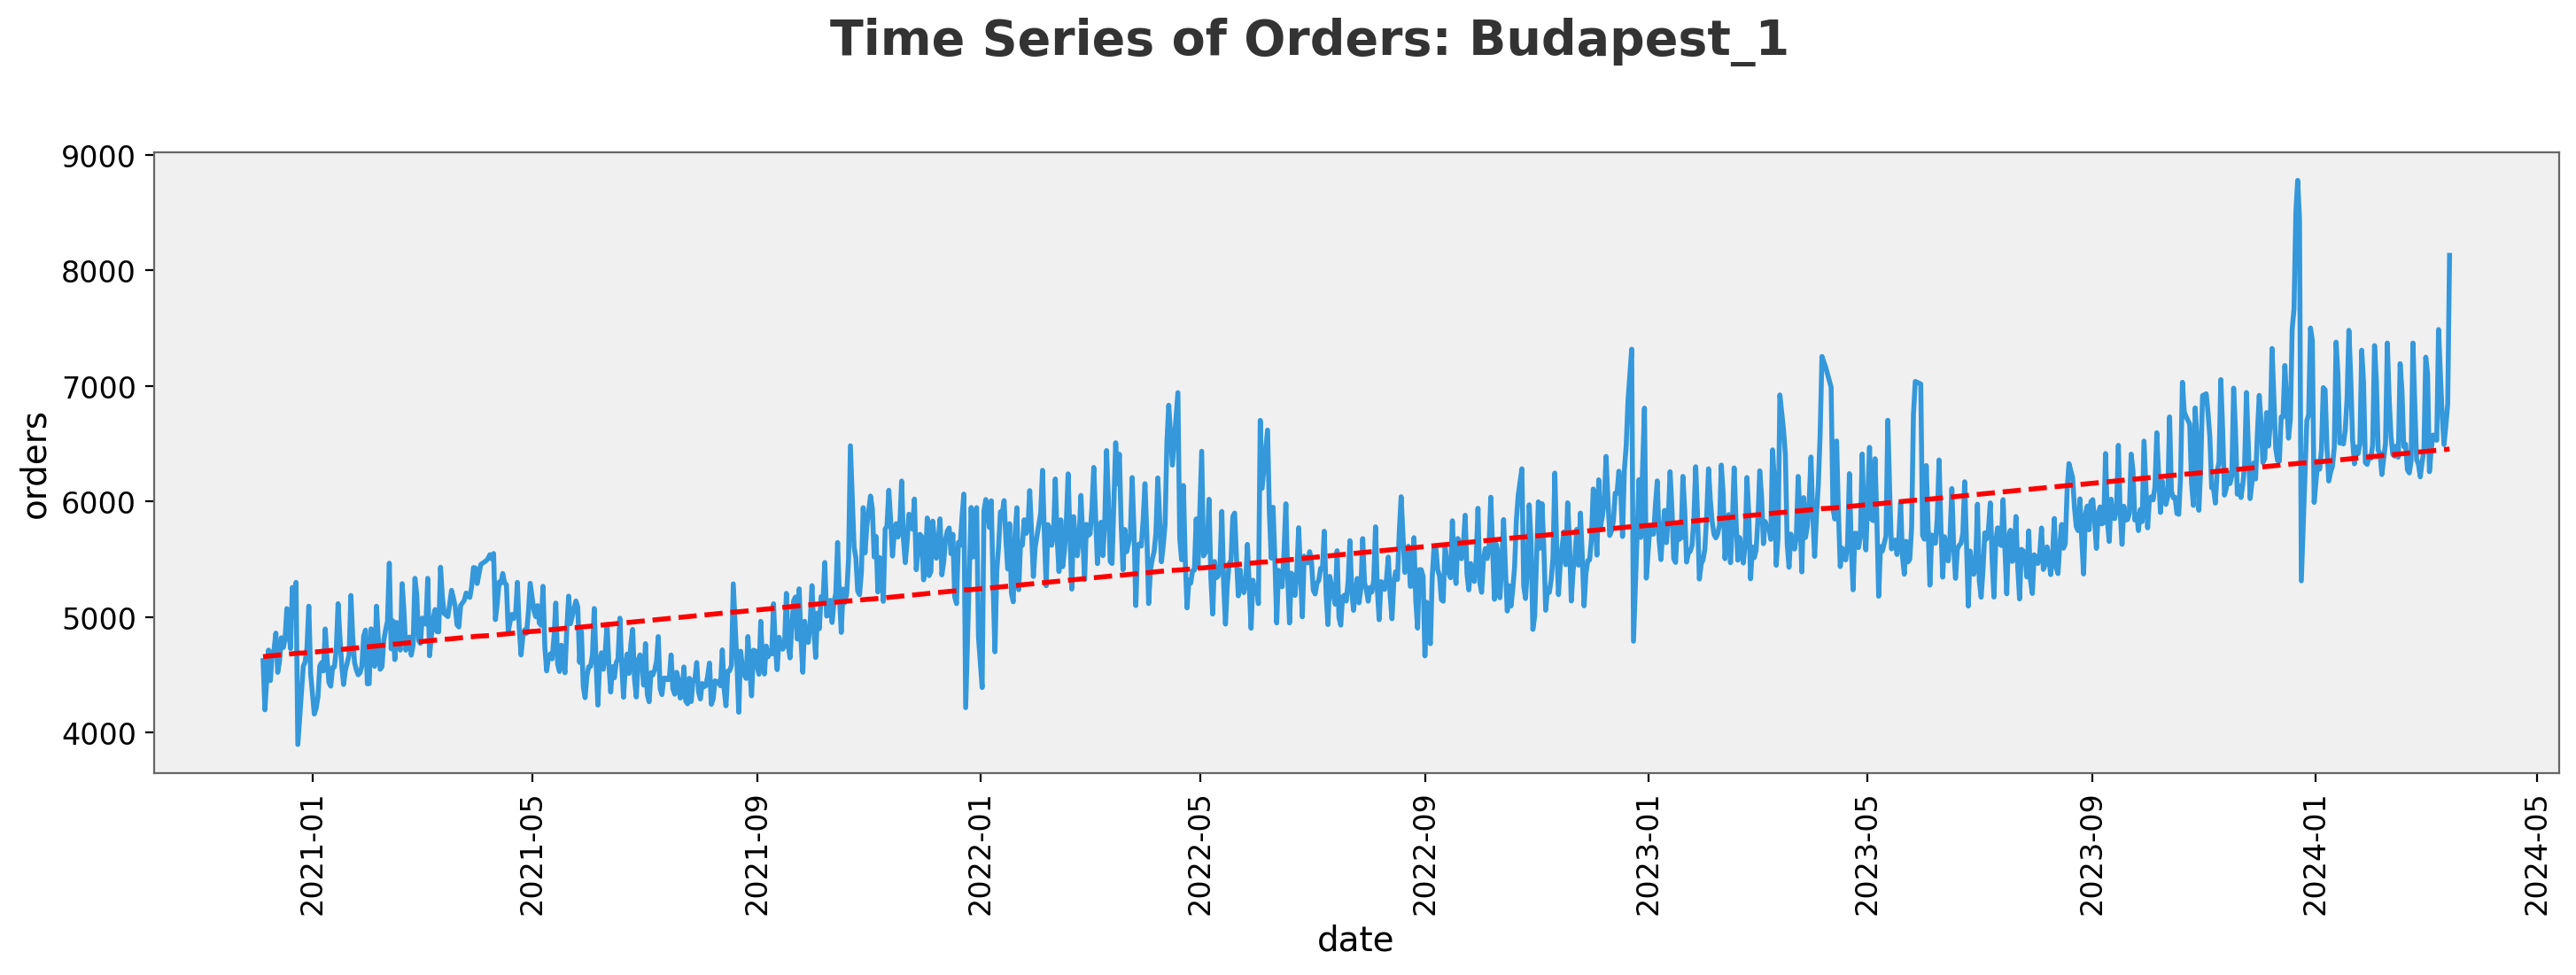

In [57]:
df['date'] = pd.to_datetime(df['date'])
for i in df.warehouse.unique():
    print("Warehouse: {} min_date: {}".format(i, df[df['warehouse']==i]['date'].min()))
    print("Warehouse: {} max_date: {}".format(i, df[df['warehouse']==i]['date'].max()))
    print('-----------------')
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Time Series of Orders: {i}', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
    sns.lineplot(x='date', y='orders', data=df[df['warehouse']==i])
    #include the trendline
    z = np.polyfit(range(len(df[df['warehouse']==i]['orders'])), df[df['warehouse']==i]['orders'], 1)
    p = np.poly1d(z)
    plt.plot(df[df['warehouse']==i]['date'],p(range(len(df[df['warehouse']==i]['orders']))),"r--")
    plt.xlabel('date')
    plt.ylabel('orders')
    plt.tight_layout()
    plt.xticks(rotation=90);

### Multi-variate Analysis

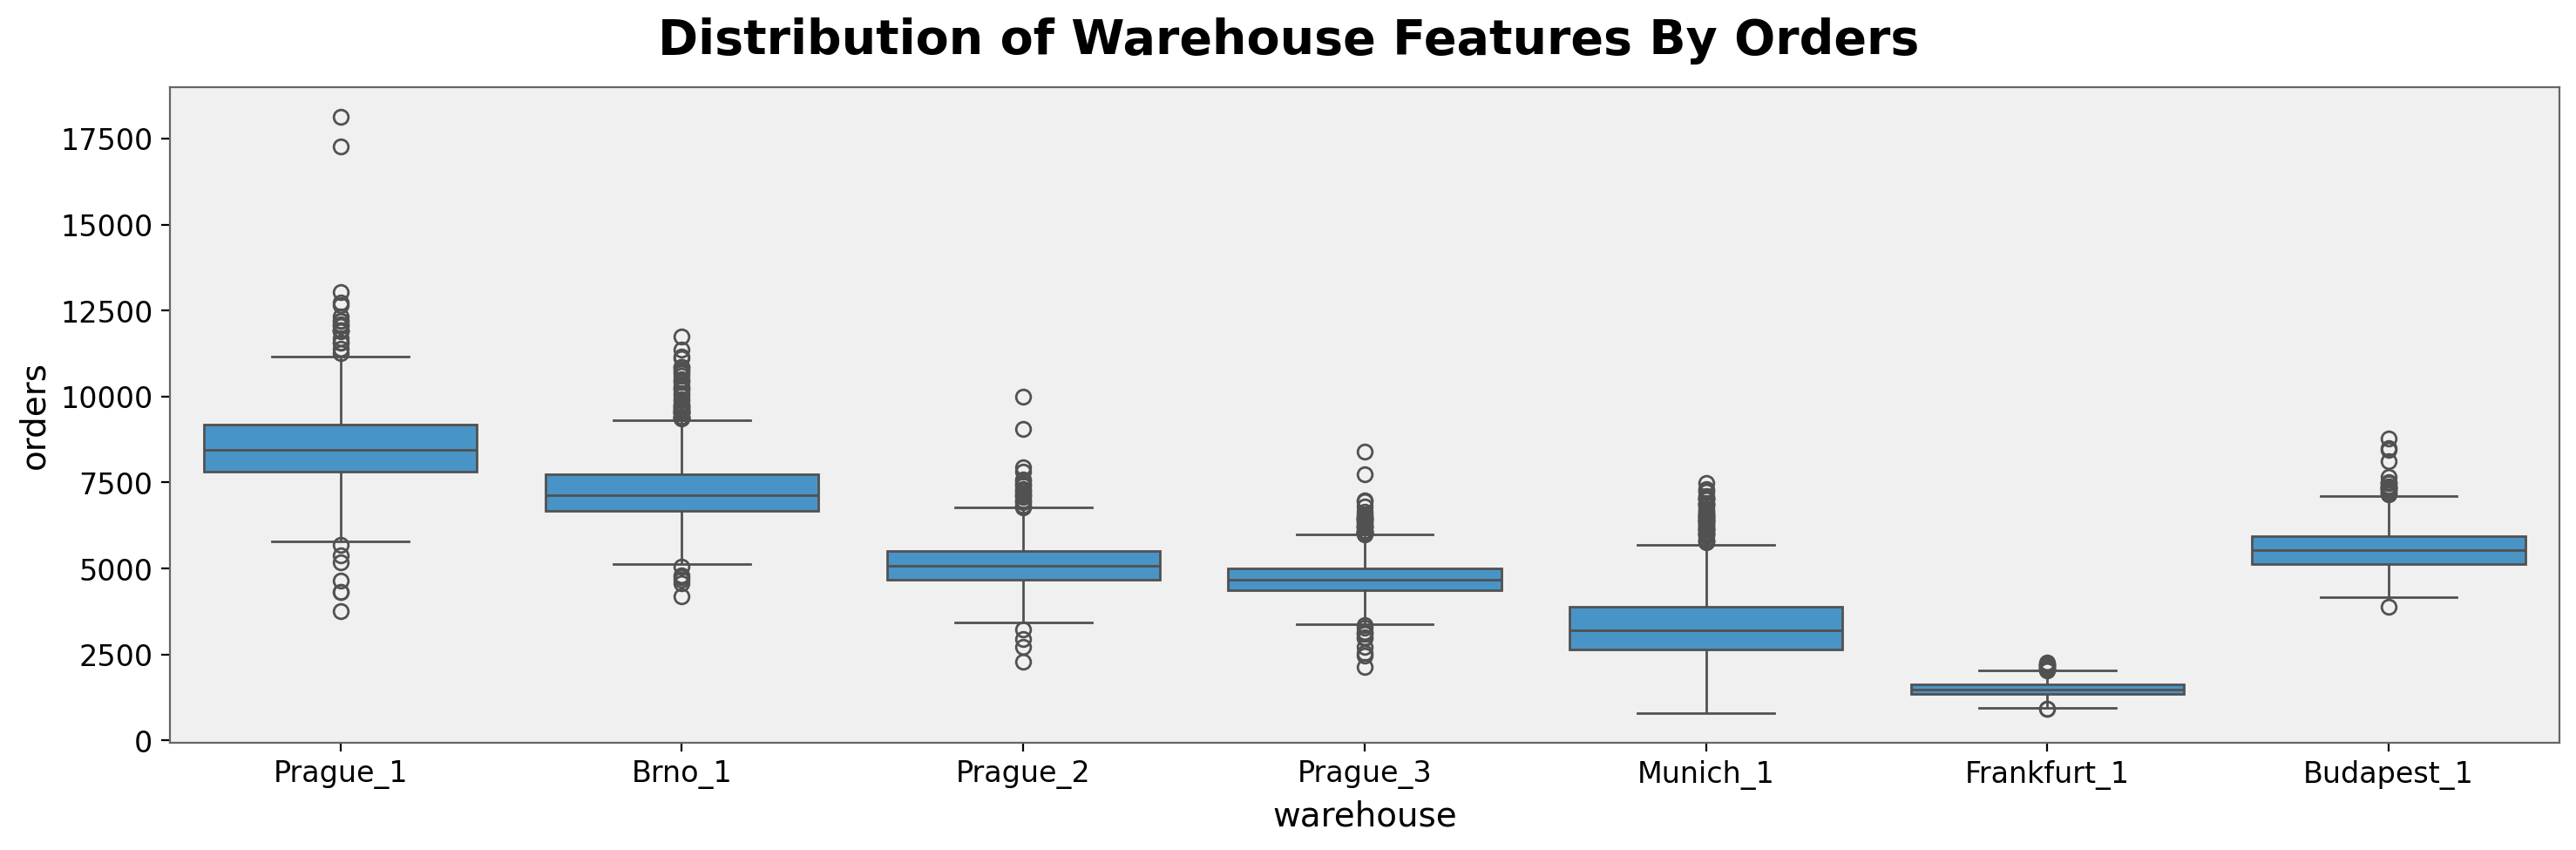

In [58]:
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle('Distribution of Warehouse Features By Orders',fontsize=20, fontweight='bold', ha='center')
sns.boxplot(data=df, x='warehouse', y='orders',ax=ax)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

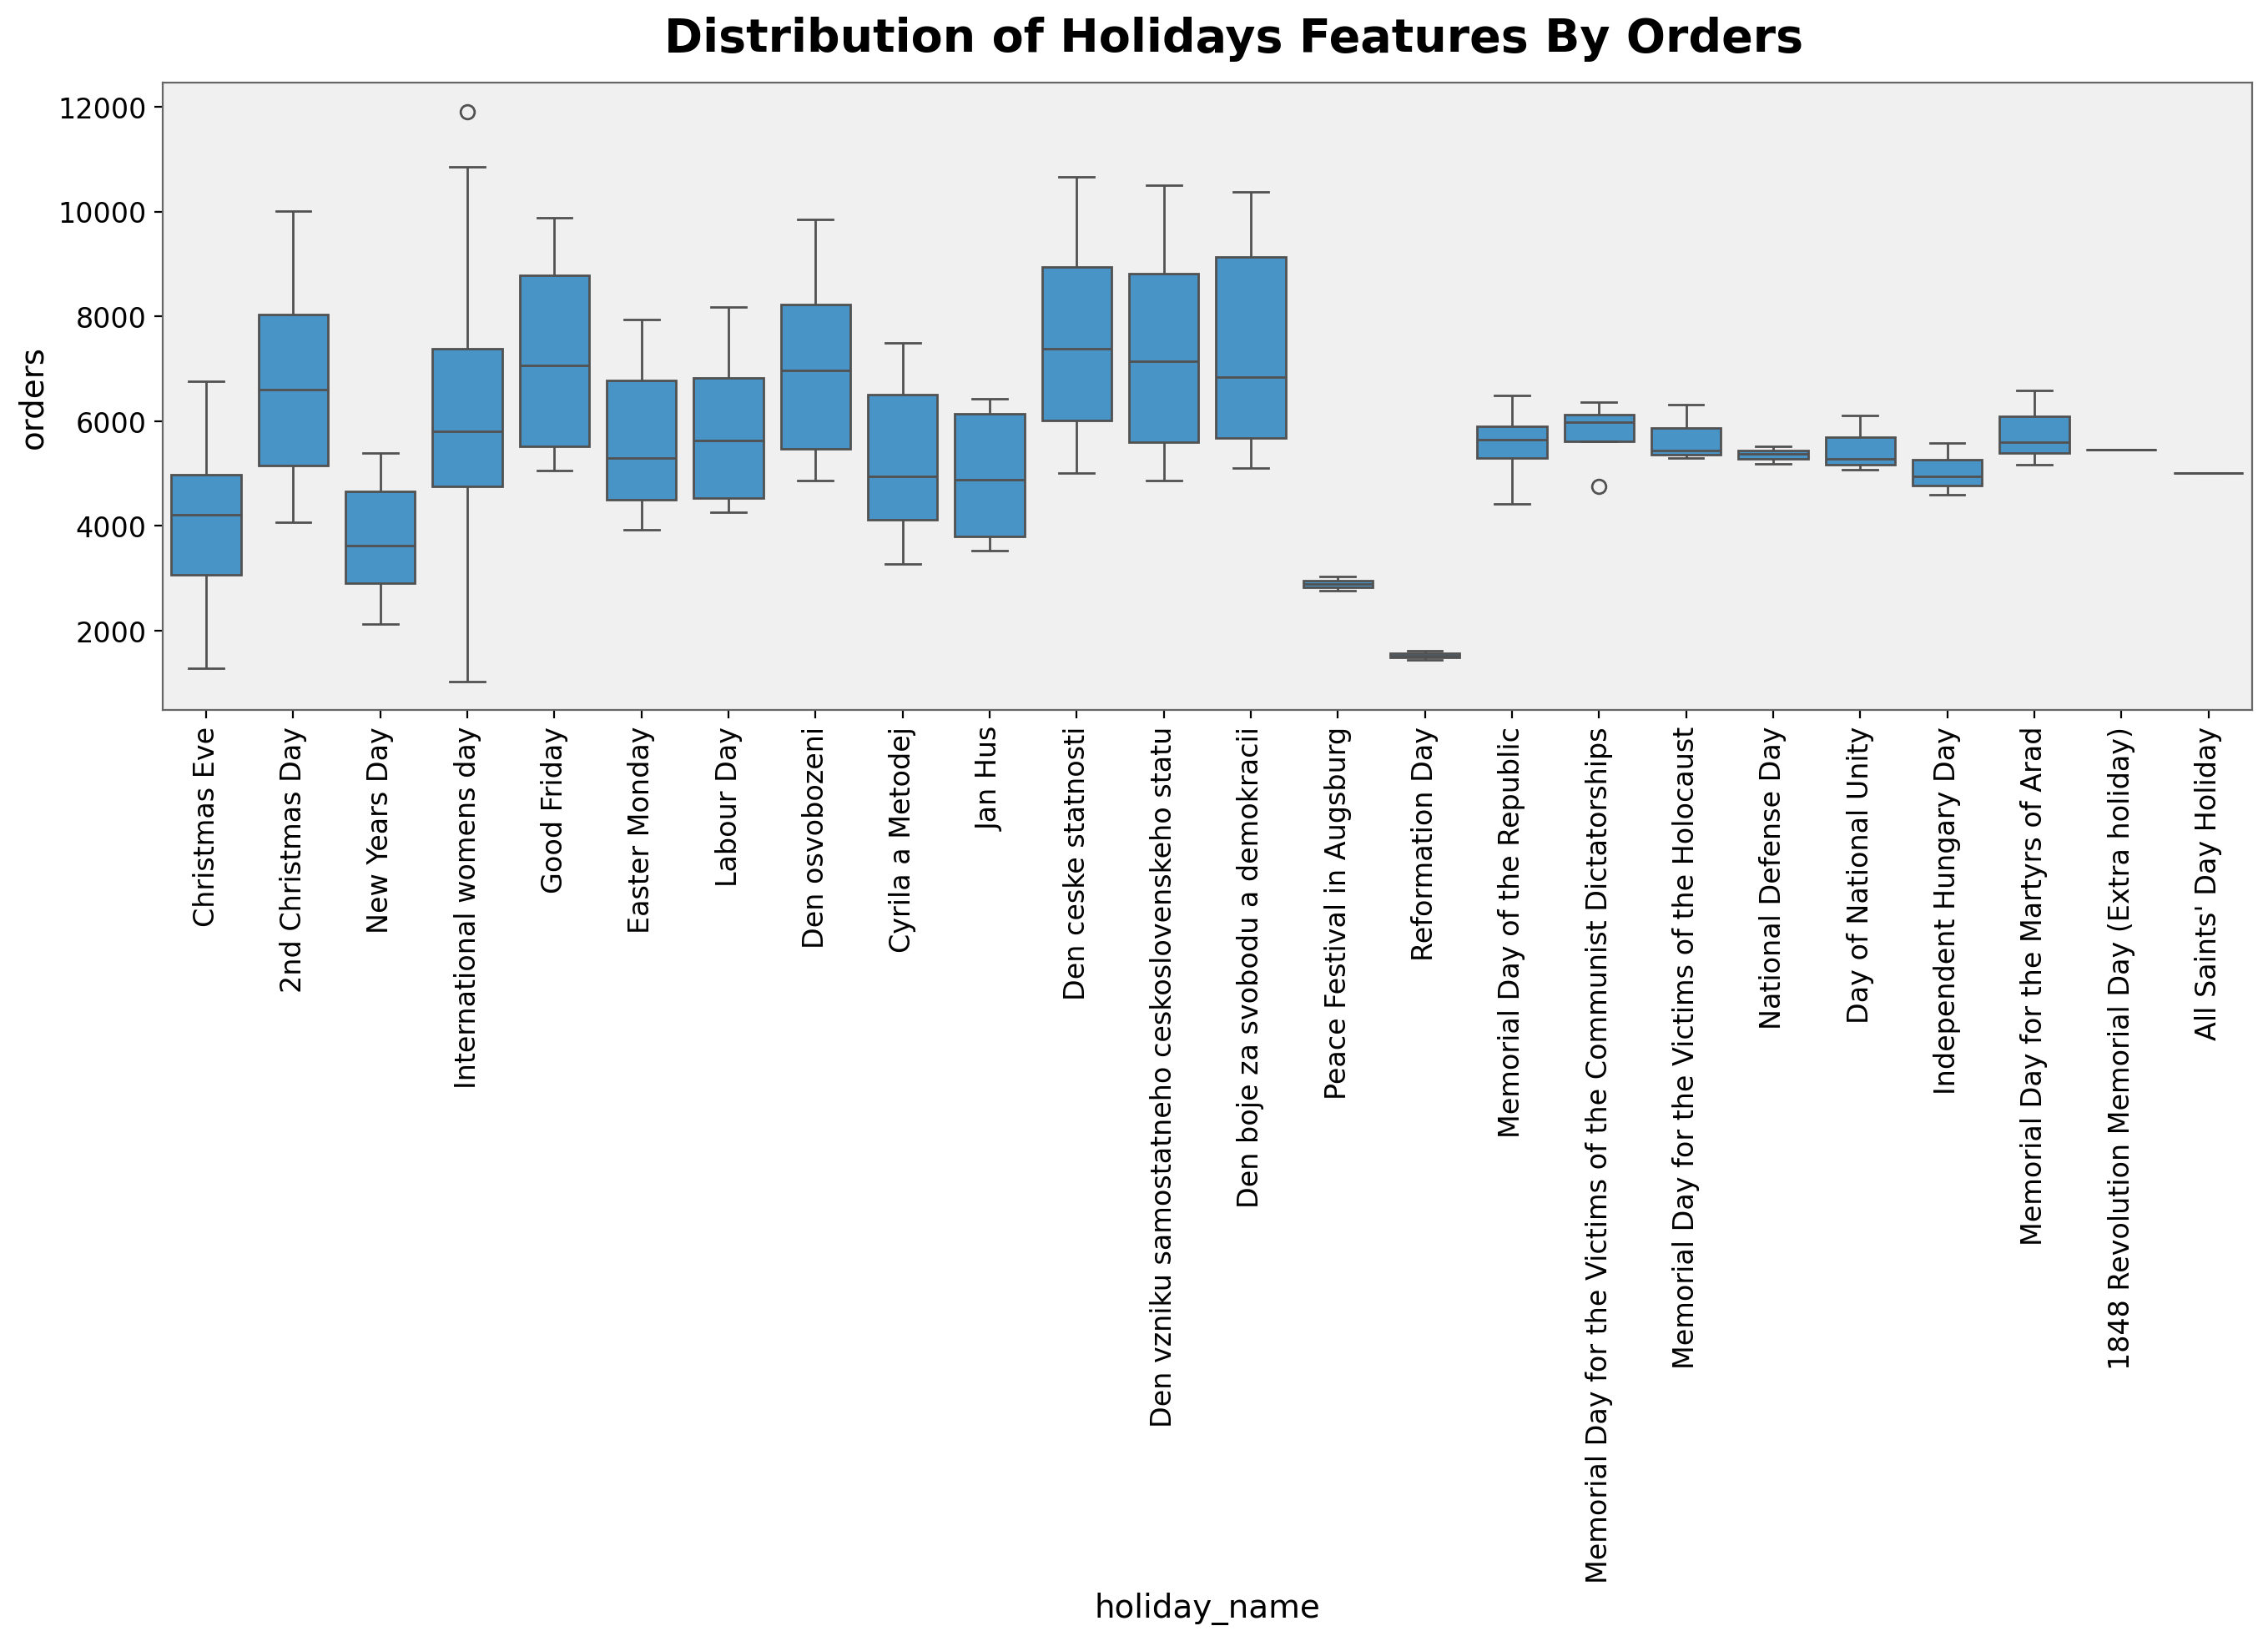

In [59]:

fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle('Distribution of Holidays Features By Orders',fontsize=20, fontweight='bold', ha='center')
sns.boxplot(data=df, x='holiday_name', y='orders',ax=ax)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(rotation=90);

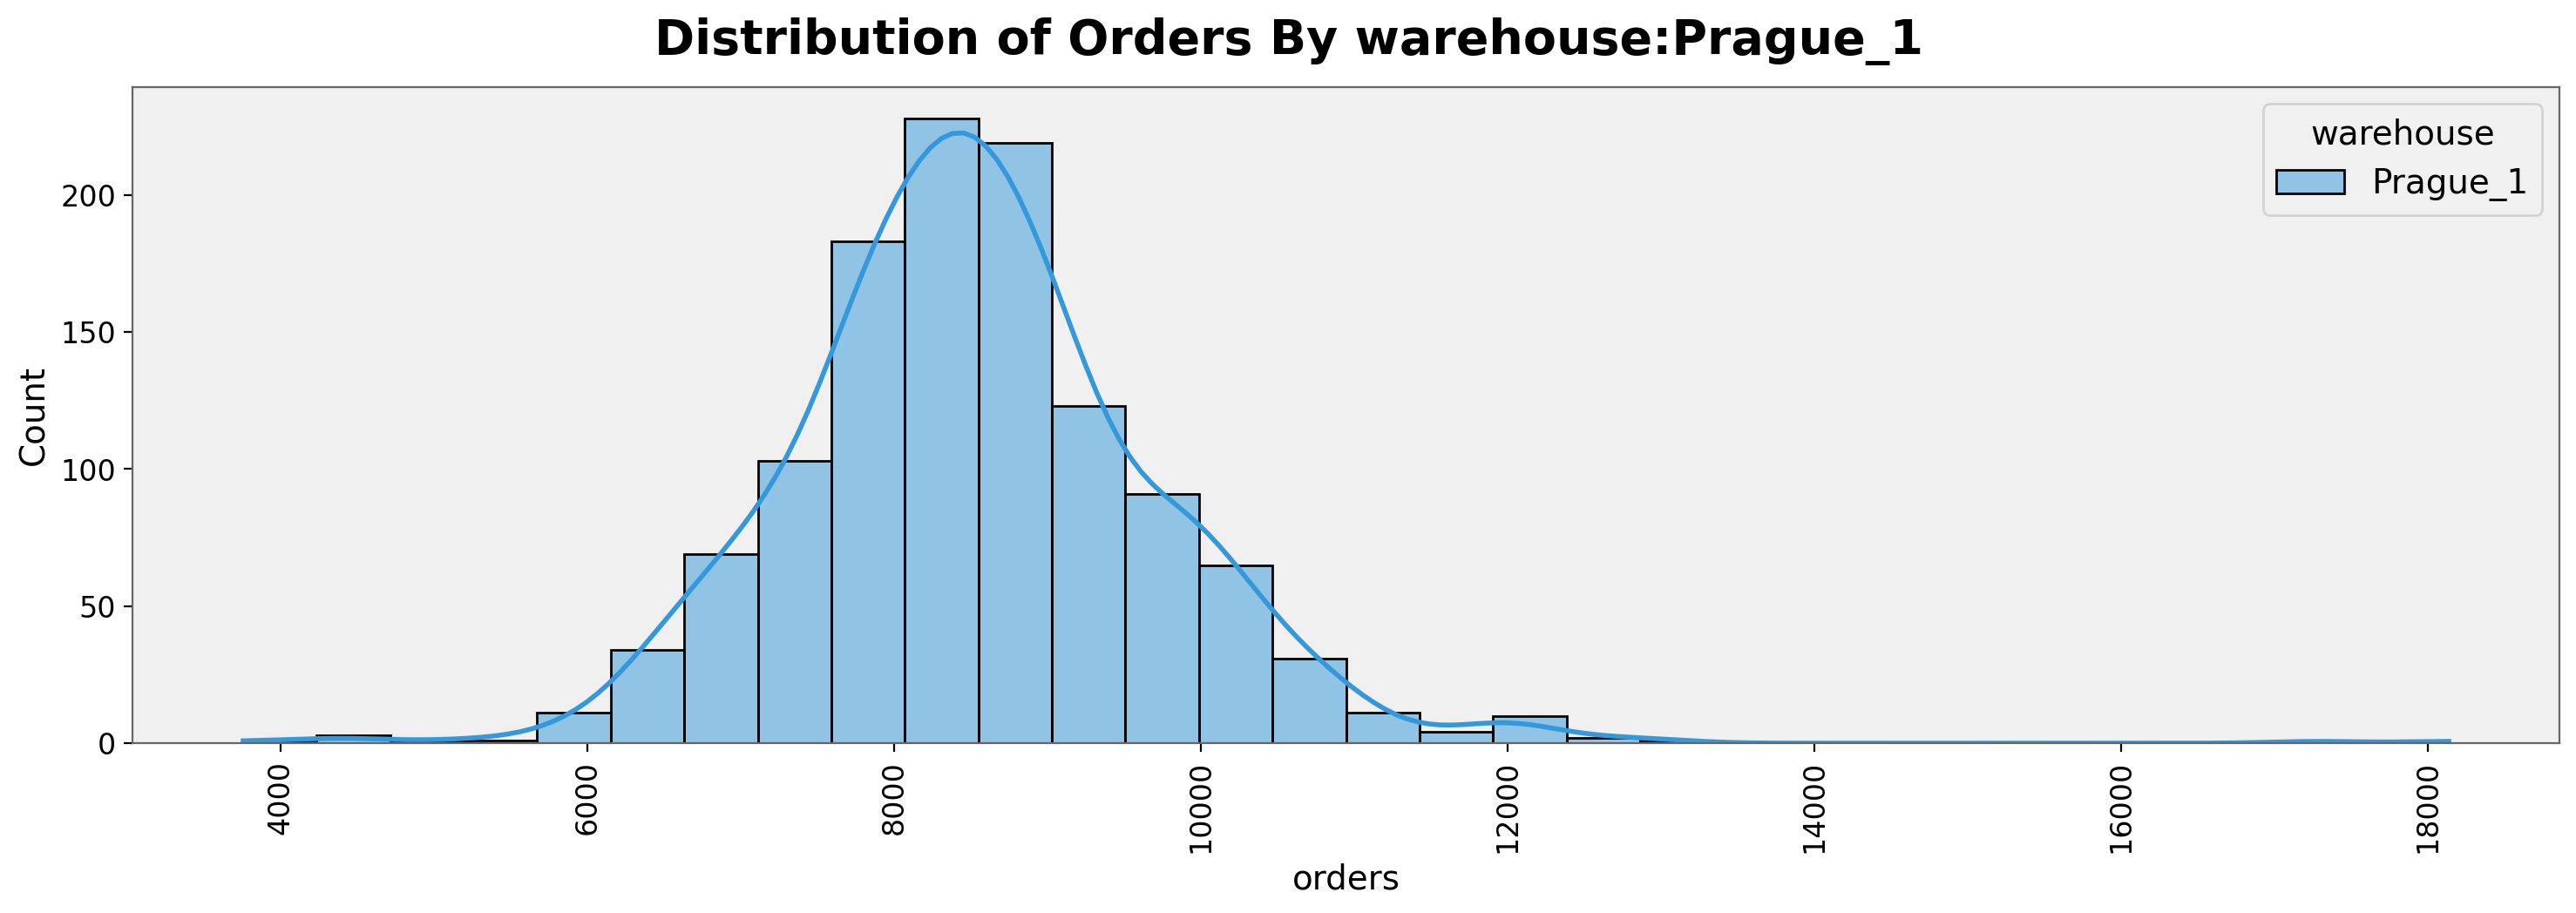

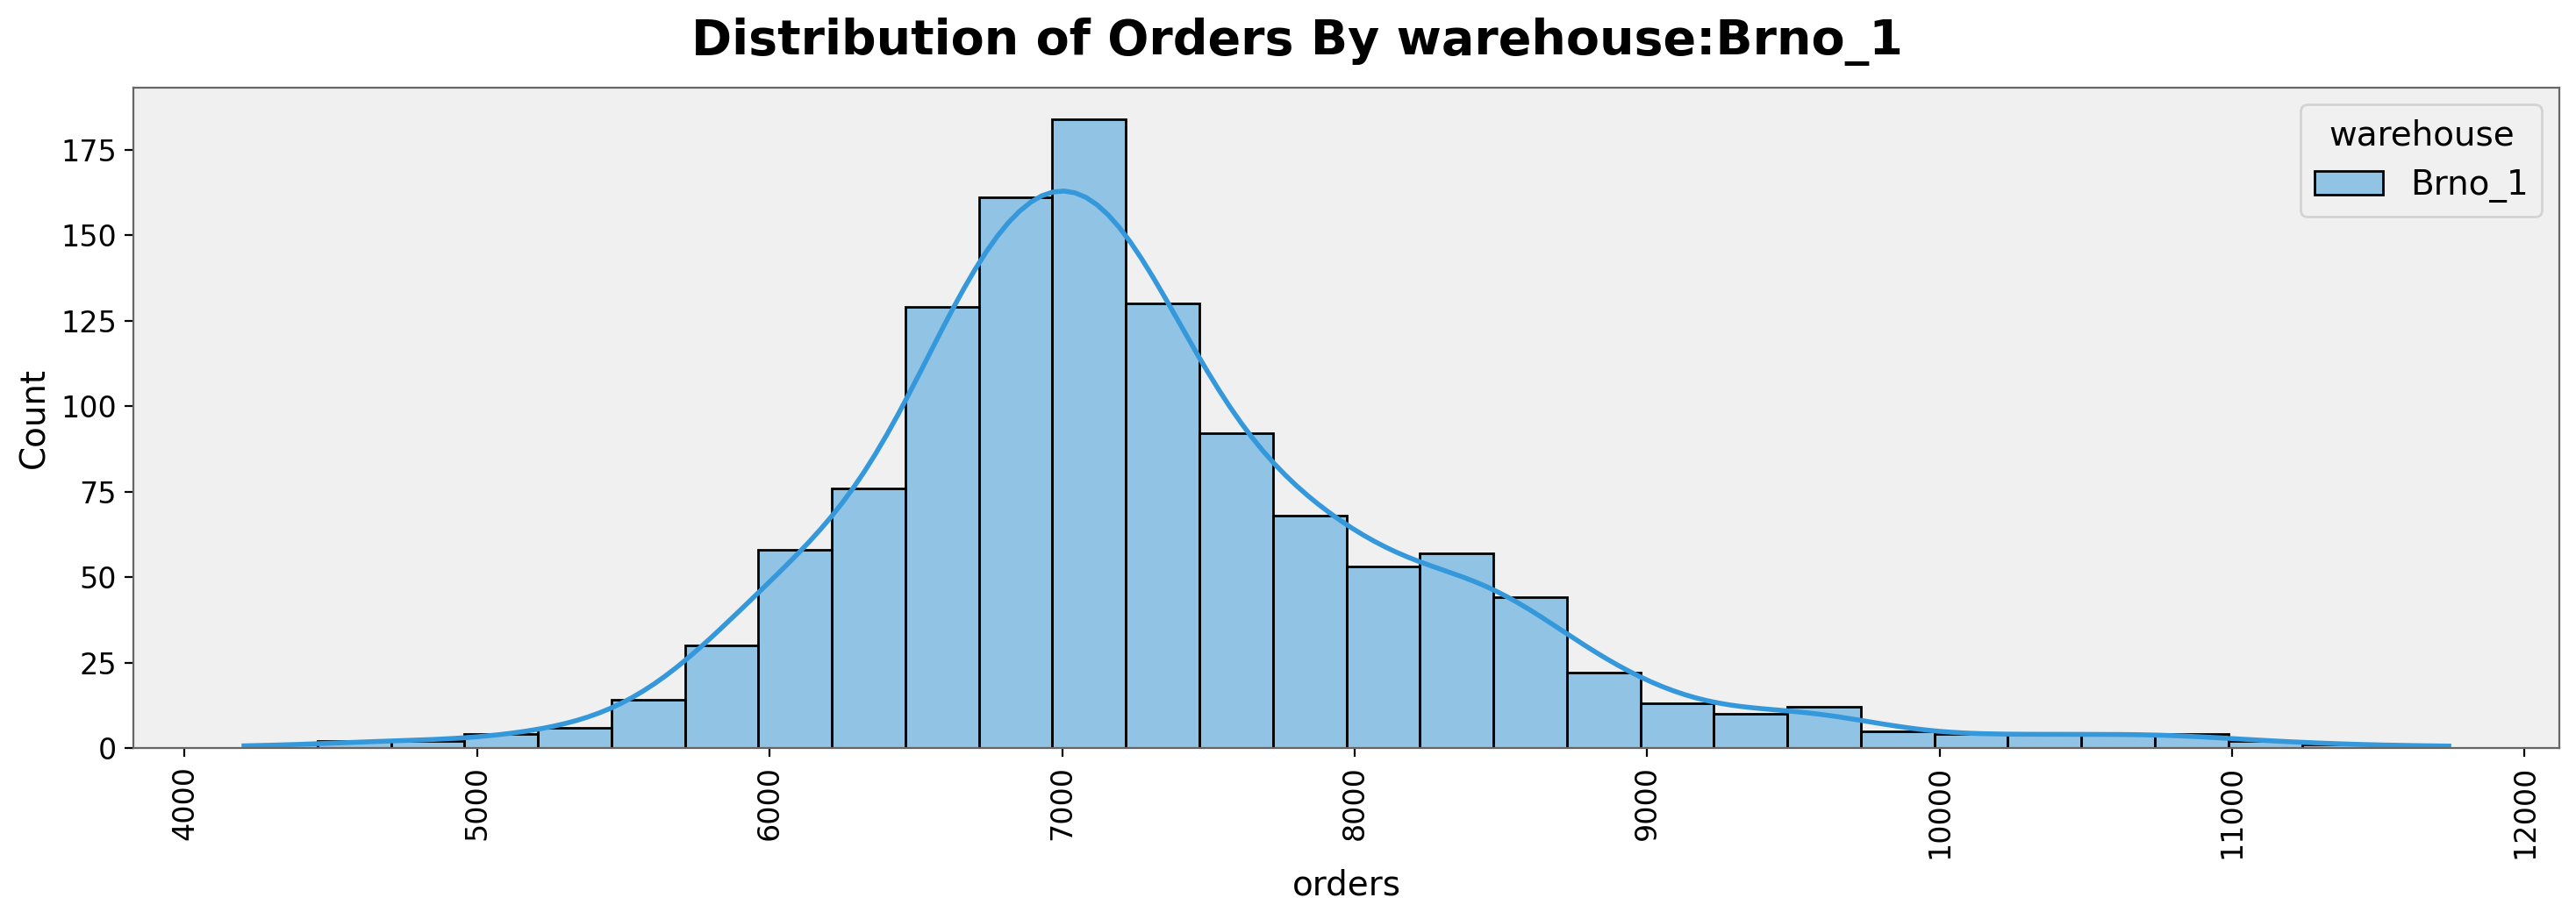

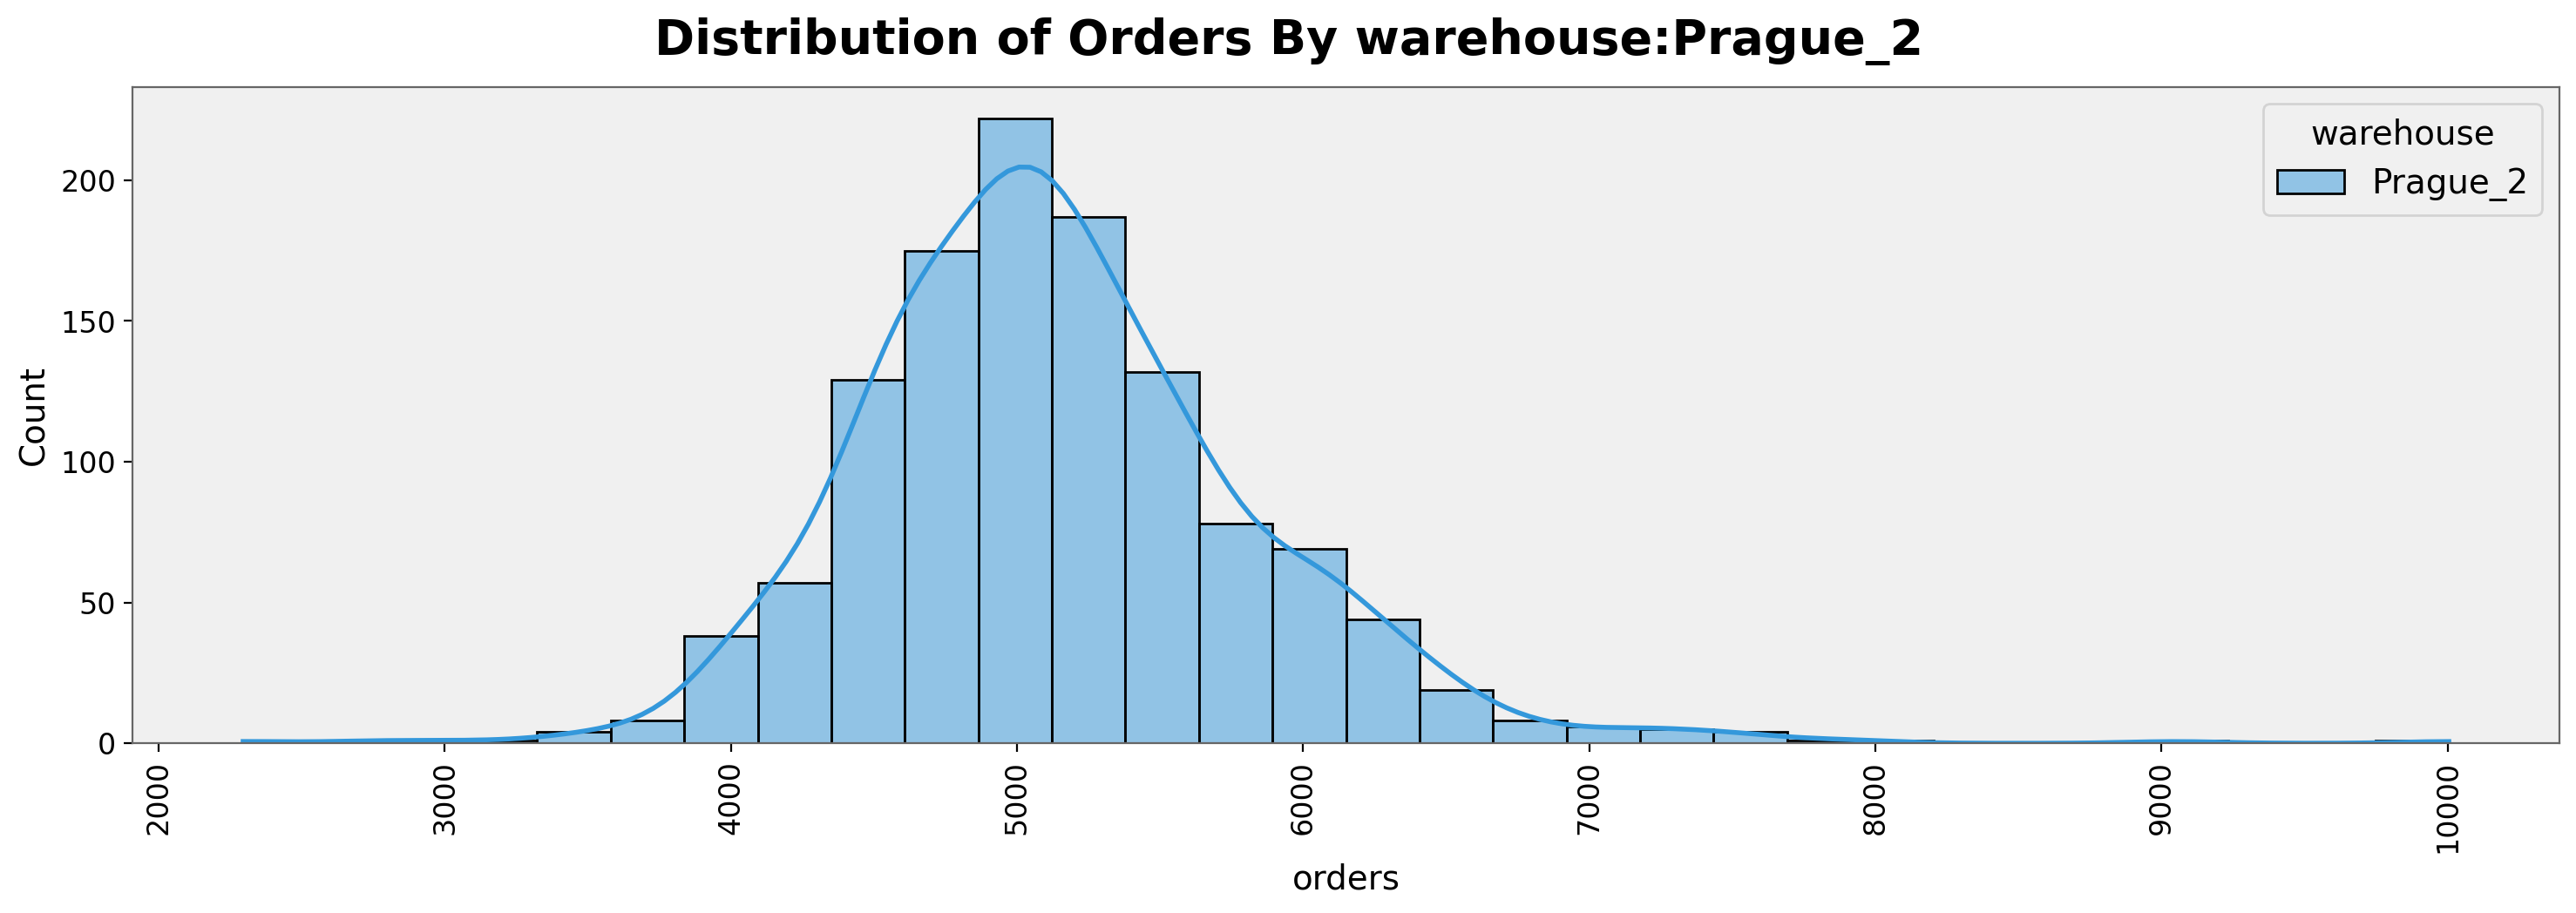

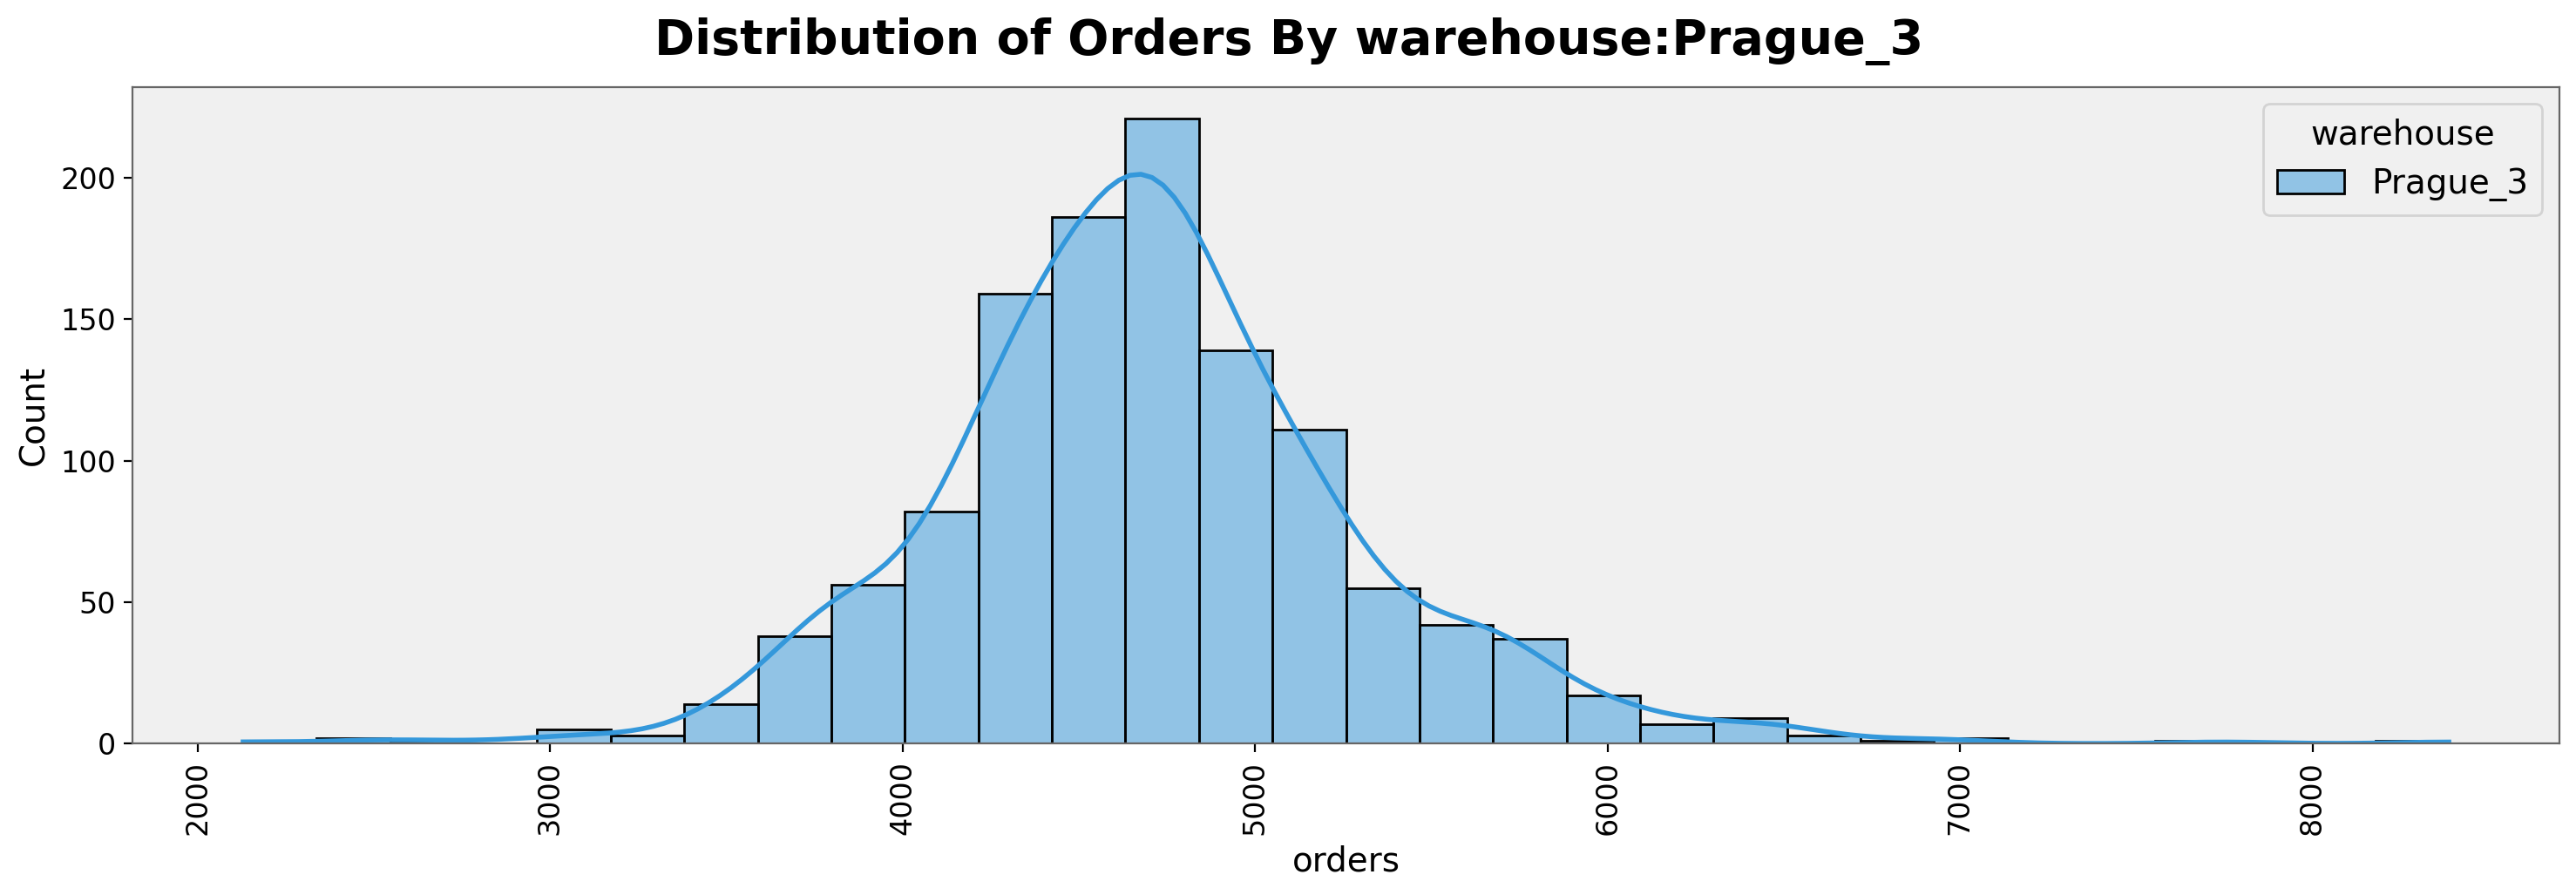

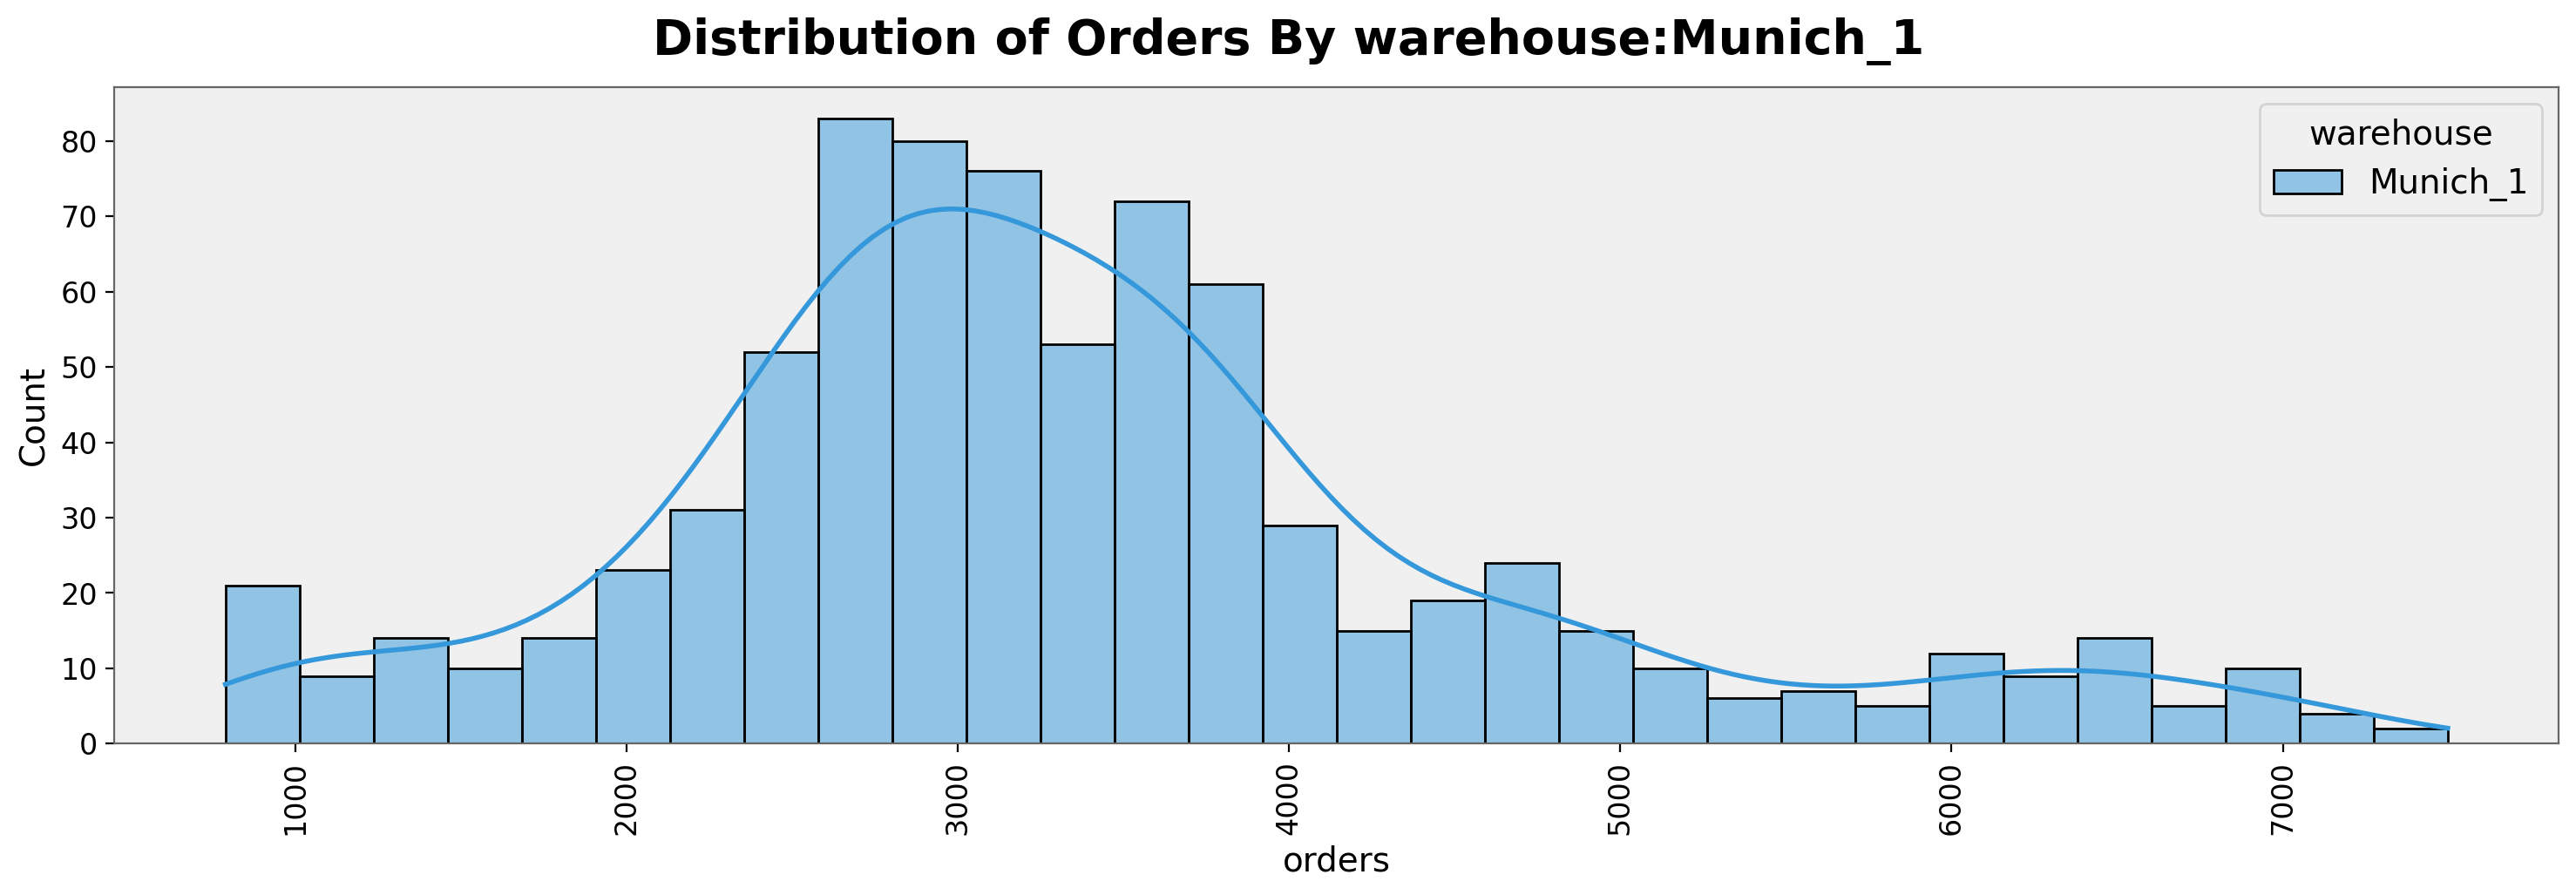

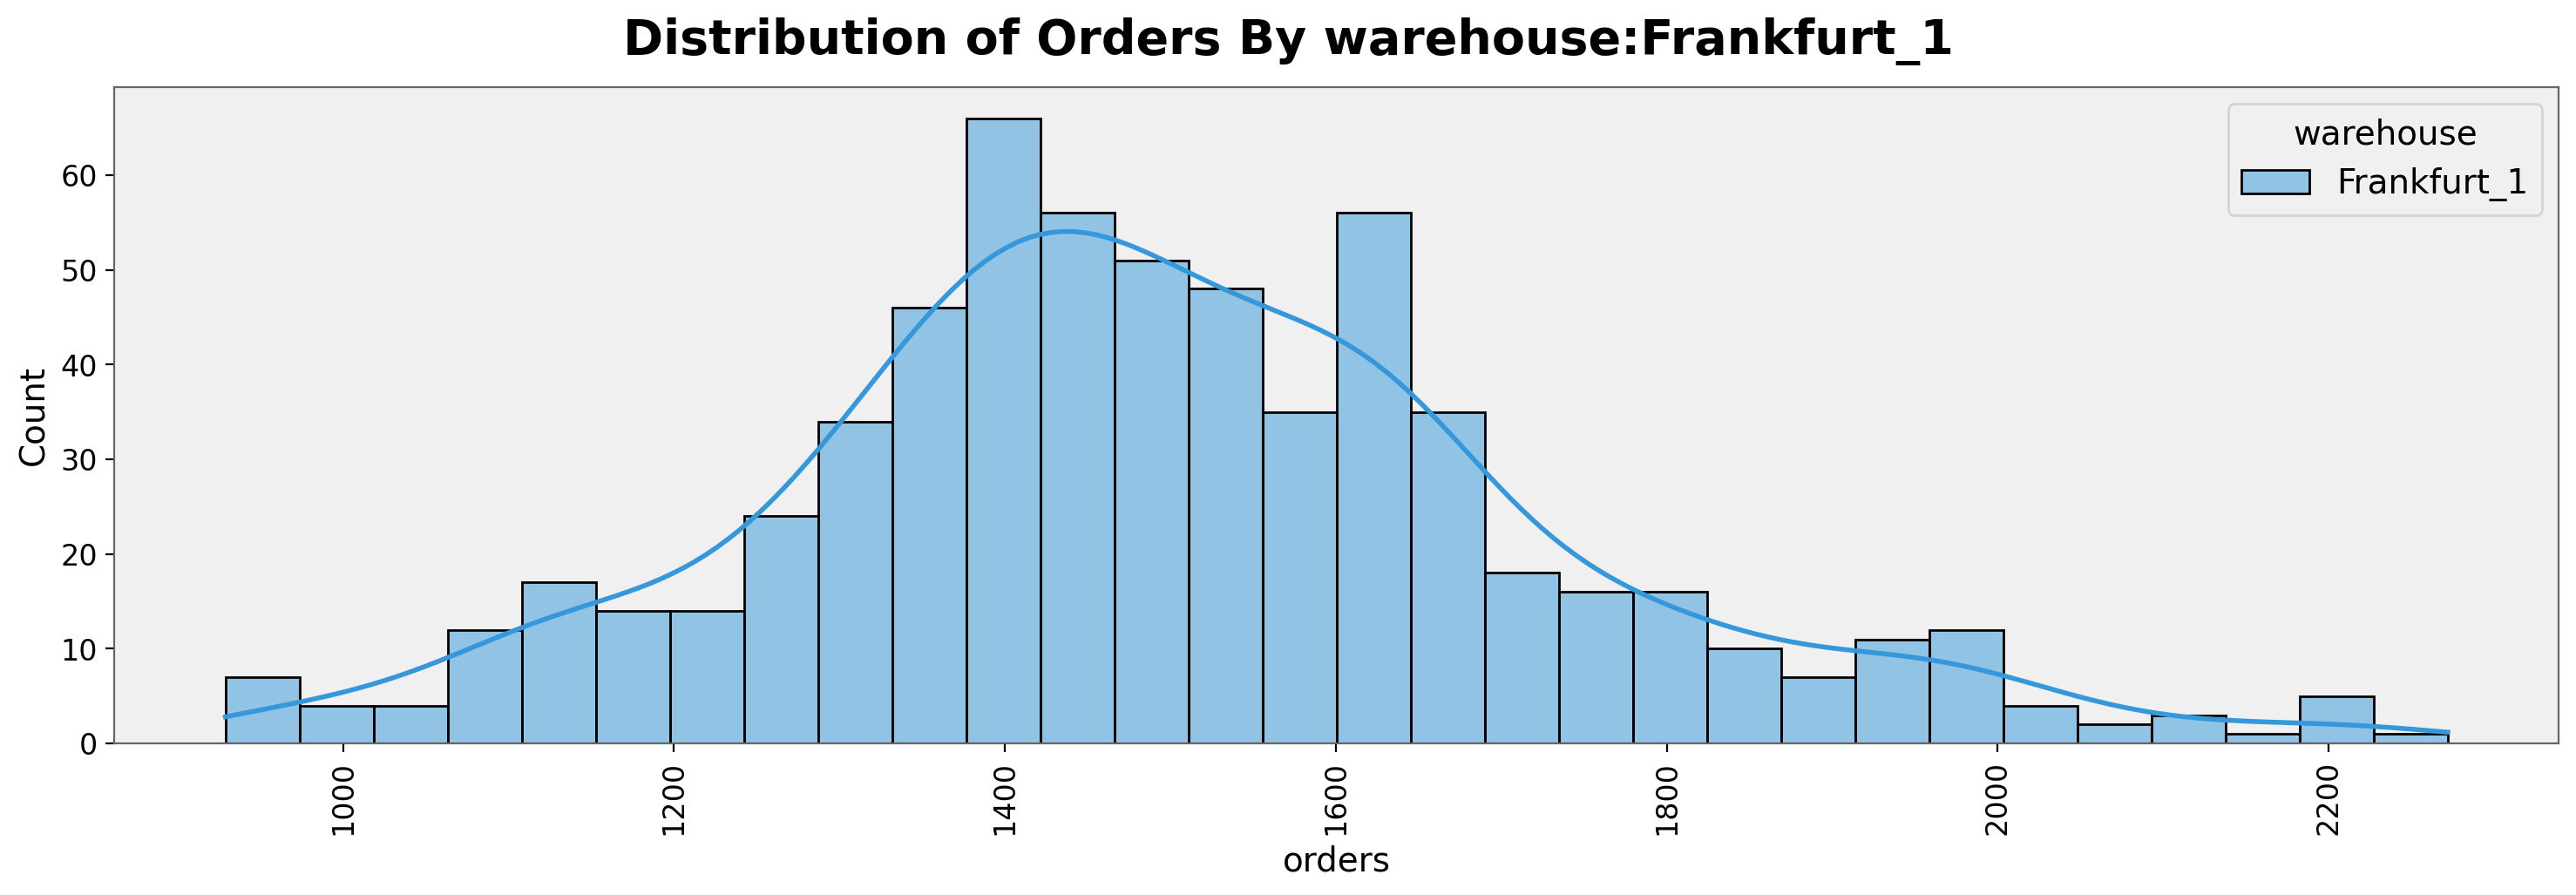

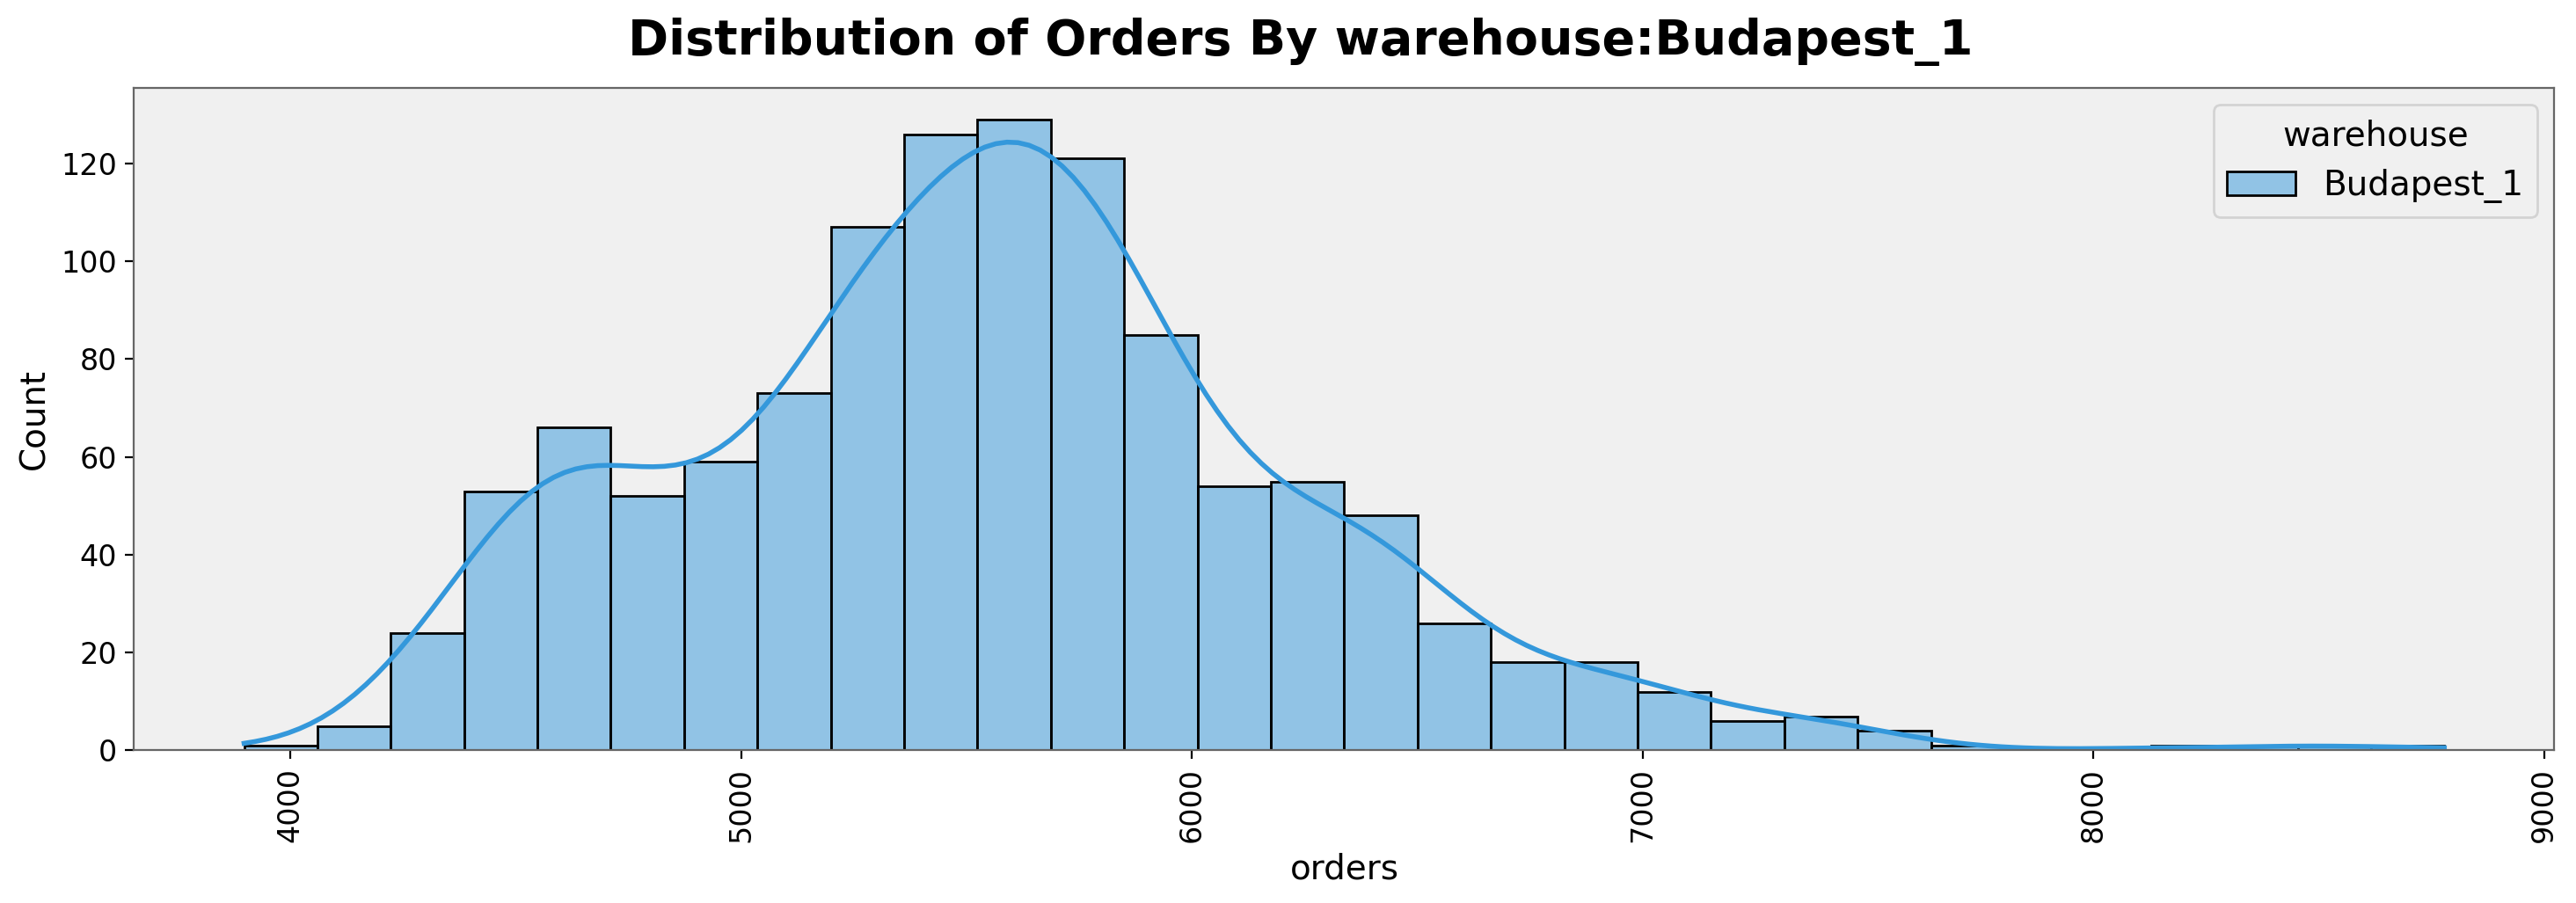

In [60]:
for i in df.warehouse.unique():
    fig, ax = plt.subplots(figsize=(15,5))
    fig.suptitle(f'Distribution of Orders By warehouse:{i}',fontsize=20, fontweight='bold', ha='center')
    sns.histplot(data=df[df['warehouse']==i], x='orders', hue='warehouse', bins=30, kde=True, 
                    multiple='stack',ax=ax)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    plt.xticks(rotation=90);

#### Check Multicollinearity for Categorical features

- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e `orders`

> Null Hypothesis (Ho): The Feature is independent of target column (No-Correlation)

> Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)



In [65]:
categorical_features

['warehouse', 'holiday_name']

In [66]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['orders'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

Column               Hypothesis Result
0     warehouse          Reject Null Hypothesis
1  holiday_name  Fail to Reject Null Hypothesis

### Few Observations from the EDA

 - This data has 7340 rows and 9 columns 
 - Out of which: 
              - Categorical: 2
              - Numerical:6
              - date: 1
        
 - The data type for the column date needs to be changed from object type to date tyep.
 - There are NAN values in the holiday name which needs to be replaced by 'No Holiday'.
 - 'holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays' has only values either 0 or 1
 - There are few outliers orders values which needs to be removed for the respective warehouses
 - After the chi-sq test we can conclude that holiday_name can me removed while creating the models